<a href="https://colab.research.google.com/github/EnriqueFV/AI-applied-to-engineering/blob/main/Preparaci%C3%B3_de_dades_(Treball_sobre_la_qualitat_de_l'aire_de_Barcelona).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treball sobre la qualitat de l'aire de Barcelona
Enrique Franky Vargas,
Laura Aguiar Apolinar

##Objectius de projecte: 
  - Fer-se preguntes sobre què volem (i/o podem) treure de les dades
  - Anticipar preguntes sobre interrelació entre condicions metereològiques i de qualitat de l’aire (contaminació)

##Objectius d’aprenentatge:
  - Assolir soltura en les operacions de preparació i exploració de dades que   ofereix Pandas (i com complementar-les amb una mica de codi de Python).
  - Assolir soltura en les operacions de transformació de dades.
  - Assolir soltura en les operacions de visualització de dades.
  - Aprendre a interpretar el resultat de l’exploració de dades i qüestionar-se interpretacions i explicacions causals “de sentit comú”.
  - Aprendre a descobrir allò que no és evident i preguntar-se com contrastar i extreure encara més de les dades


#Tasques a realitzar: 


##[Dades de qualitat de l’aire](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/qualitat-aire-detall-bcn): 


### any 2021

- [x] Explorar i transformar les dades de la qualitat de l’aire de Barcelona de 2021. 
   - [x] Carregar les dades y concatenar dataframes.
   - [x] Agrupamos por estacion y codigo contaminante.
   - [x] Separamos los datos de medidas de las validaciones.
- [x] Fer les transformacions pertinents
   - [x] Transformamos a formato de fecha. 
   - [x] Encontramos los valores Nan.
   - [x] Encontramos los valores No validados.
   - [x] Reemplazamos los valores Nan.
   - [ ] Normalizamos. 
- [x] Posar en un format preferenement numèric tots els valors (podem deixar-ne alguns com a “strings” o textos? Amb quin objectiu?)
  -[x] Ya estan con formato numerico.
- [x] Assegurar-se de que són vàlids utilitzant les columnes que comencen per “Vxx”
  - [x] Localizar posciciones nan's y no validadas.
  - [x] Comparar daatframes para encontrar coincidencias entre las posciciones.
- [x] Hi ha algun altre valor que us faci sospitar que ho sigui correcte.
  - [x] ¿cumple con la cantidad de datos esperada? (8600 horas en un año).
- [x] Tractar els valors no presents utilitzant les tècniques presentades en classe ( i que estan breument descrites a les transparències U1. 
  - [x] Reemplazamos los valores nan por el promedio de horas semanal.
- [ ] Data Explorartion


####Carga de datos

Montamos el Drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mDates
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/' #CAMBIAR ACORDE A TU DRIVE!!!
path = '/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/'

 2021
 2022
 2023
'Datos limpios'
'Datos normalizados'
 metadata
'Preparació de dades (Treball sobre la qualitat de l'\''aire de Barcelona).ipynb'


#####Metadata

In [ ]:
!ls '{path}metadata' #CAMBIAR ACORDE A TU DRIVE!!!

indicadors_ambientals_basicsII.xls  qualitat_aire_contaminants.csv
MeteoCat_Metadades.csv


In [ ]:
meta_QA=pd.read_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/metadata/qualitat_aire_contaminants.csv')
meta_QA

,Codi_Contaminant,Desc_Contaminant,Unitats
0,1,SO2,µg/m³
1,7,NO,µg/m³
2,8,NO2,µg/m³
3,9,PM2.5,µg/m³
4,12,NOx,µg/m³
5,14,O3,µg/m³
6,6,CO,mg/m³
7,10,PM10,µg/m³
8,22,Black Carbon,µg/m³
9,999,Biomassa Black Carbon,%


Para entender mejor estos contaminantes y que podemos interpretar de ellos, nos referimos a la informacion disponible en la **Direcció General de Qualitat Ambiental i Canvi Climàtic de la Generalitat de Catalunya**, la cual es la fuente oficial de estos datos. 

En la seccion de [indicadores y estadisticas](https://mediambient.gencat.cat/ca/dades-documentacio/estadistica/indicadors-i-estadistiques/) hay un archivo xls en el cual esta registrada la información respecto a como se utilizan estos y otros indicadores en las estadisticas de la calidad ambiental y cambio climatologico (desde enero de 2010). En este se incluyen indicadores de residuos, biodiversidad, gestión forestal, aire, empresa y calidad del aire y agua. 

Hay cuatro indicadores en los que se utilizan estos conntaminantes del aire: 



* Evolucion ICQA: 

"*L'Índex català de qualitat de l'aire (ICQA) es calcula a partir de les dades de les estacions automàtiques de la Xarxa de Vigilància i Previsió de la Contaminació Atmosfèrica (la XVPCA). S'utilitzen per al càlcul de l'ICQA els nivells d'immissió de: el monòxid de carboni (CO), el diòxid de nitrogen (NO2), el diòxid de sofre (SO2), l'ozó (O3) i les partícules en suspensió (PM10).*

*L'ICQA, és una xifra única i sense unitats que pondera l'aportació dels diferents contaminants mesurats (CO, NO2, SO2, O3 i PM10) a la qualitat global de l'aire.*

*L'ICQA del dia és l'ICQA ocasionat pel contaminant que hagi pogut produir una major afectació sobre la qualitat de l'aire aquell dia. L'ICQA es calcula per a totes les estacions automàtiques tot i que en algunes no es mesurin els 6 contaminants que el determinen.*

*Un ICQA negatiu significa que, com a mínim, un dels contaminants ha ultrapassat el nivell límit d'immissió fixat per la normativa vigent actualitzada. Un ICQA positiu significa que els 6 contaminants que el determinen estan presents a l'aire en concentracions inferiors als valors límit.*

*A partir del valor numèric de l'ICQA es defineix una qualitat de l'aire, d'aquell dia. Quan més alt és l'ICQA més alta és la qualitat de l'aire. L'ICQA s'ha d'interpretar com un indicador orientatiu de la qualitat de l'aire adreçat especialment al públic general. *
* Contaminación de ozono:

*L'indicador mostra la concentració acumulada al llarg d'un any dels màxims de les mitjanes 8-horàries de cada dia que superen els 70 micrograms d'ozó per metre cúbic d'aire a les estacions de fons dins d'aglomeracions urbanes.*

* Contaminación del aire PM10:

*L'indicador ens mostra el resultat de la mitjana anual de concentració de les partícules de diàmetre inferior a 10 micres (PM10) en els punts de mesuraments de fons en aglomeracions urbanes. Per tant, és la concentració mitjana a la qual està exposada la població en aglomeracions urbanes.*

*L’any 2005, va entrar en vigor els valors límit per les PM10 establerts en el Reial Decret 1073/2002, el qual estableix no superar una concentració de 50 μg/m3 en més de 35 dies a l’any i no superar una concentració mitjana anual de 40 μg/m3. Per avaluar el compliment d'aquesta norma es necessari disposar d'informació sobre aquestes superacions i fer-ne el corresponent seguiment.*

* C emisiones totales: 

*Es tracta d'un indicador agregat (combinació ponderada dels 6 gasos inclosos en el Protocol de Kyoto) expressat en forma d'índex. Ens mostra l'evolució de les emissions de GEH per sectors des de l'any base (1990) fins a l'any 2007. Aquests sectors són els considerats pel Grup Intergovernamental d'Experts sobre el Canvi Climàtic (GI-ECC), o el què és el mateix en anglès (IPCC). S'observa que les emissions totals a Catalunya han crescut en aquest període un 43%. Els principals causants d'aquestes emissions*

*Els GEH absorbeixen i reemeten la radiació infraroja, així impedeixen la seva alliberació a l’espai, i s'eleva la temperatura de l’atmosfera a les capes més properes a la superfície terrestre. Si l’equilibri natural es trenca i la temperatura global augmenta, posa en perill la composició, la capacitat de recuperació i la productivitat dels ecosistemes naturals, i també, el desenvolupament econòmic i social, la salut i el benestar de la humanitat.*






#####Exploramos los ficheros

In [ ]:
!ls "/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2021/Qualitat de l'aire" #CAMBIAR ACORDE A TU DRIVE!!!

2021_01_Gener_qualitat_aire_BCN.csv   2021_07_Juliol_qualitat_aire_BCN.csv
2021_02_Febrer_qualitat_aire_BCN.csv  2021_08_Agost_qualitat_aire_BCN.csv
2021_03_Marc_qualitat_aire_BCN.csv    2021_09_Setembre_qualitat_aire_BCN.csv
2021_04_Abril_qualitat_aire_BCN.csv   2021_10_Octubre_qualitat_aire_BCN.csv
2021_05_Maig_qualitat_aire_BCN.csv    2021_11_Novembre_qualitat_aire_BCN.csv
2021_06_Juny_qualitat_aire_BCN.csv    2021_12_Desembre_qualitat_aire_BCN.csv


Obtenemos los ficheros de los archivos para la calidad del aire

In [ ]:
all_files = !ls "/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2021/Qualitat de l'aire" #CAMBIAR ACORDE A TU DRIVE!!!
all_files

['2021_01_Gener_qualitat_aire_BCN.csv   2021_07_Juliol_qualitat_aire_BCN.csv',
 '2021_02_Febrer_qualitat_aire_BCN.csv  2021_08_Agost_qualitat_aire_BCN.csv',
 '2021_03_Marc_qualitat_aire_BCN.csv    2021_09_Setembre_qualitat_aire_BCN.csv',
 '2021_04_Abril_qualitat_aire_BCN.csv   2021_10_Octubre_qualitat_aire_BCN.csv',
 '2021_05_Maig_qualitat_aire_BCN.csv    2021_11_Novembre_qualitat_aire_BCN.csv',
 '2021_06_Juny_qualitat_aire_BCN.csv    2021_12_Desembre_qualitat_aire_BCN.csv']

Areglamos la lista de nombres separando cada uno individualmente en una lista

In [ ]:
all_files=[filename.split() for filename in all_files]
all_files=np.concatenate(all_files)
all_files

array(['2021_01_Gener_qualitat_aire_BCN.csv',
       '2021_07_Juliol_qualitat_aire_BCN.csv',
       '2021_02_Febrer_qualitat_aire_BCN.csv',
       '2021_08_Agost_qualitat_aire_BCN.csv',
       '2021_03_Marc_qualitat_aire_BCN.csv',
       '2021_09_Setembre_qualitat_aire_BCN.csv',
       '2021_04_Abril_qualitat_aire_BCN.csv',
       '2021_10_Octubre_qualitat_aire_BCN.csv',
       '2021_05_Maig_qualitat_aire_BCN.csv',
       '2021_11_Novembre_qualitat_aire_BCN.csv',
       '2021_06_Juny_qualitat_aire_BCN.csv',
       '2021_12_Desembre_qualitat_aire_BCN.csv'], dtype='<U38')

#####[Cargamos y concatenamos](https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe)

In [ ]:
li = []
for filename in all_files:
  df = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2021/Qualitat de l'aire/" + filename, index_col=None, header=0)
  li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2021,1,1,2.0,...,2.0,V,2.0,V,3.0,V,2.0,V,NaN,N
1,8,Barcelona,19,Barcelona,4,7,2021,1,2,1.0,...,4.0,V,5.0,V,5.0,V,5.0,V,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2021,1,3,2.0,...,24.0,V,23.0,V,23.0,V,8.0,V,NaN,N
3,8,Barcelona,19,Barcelona,4,7,2021,1,4,4.0,...,3.0,V,7.0,V,7.0,V,1.0,V,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2021,1,5,2.0,...,10.0,V,5.0,V,4.0,V,4.0,V,6.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19113,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,4.0,V,12.0,V,4.0,V,4.0,V,4.0,V
19114,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,56.0,V,58.0,V,57.0,V,57.0,V,57.0,V
19115,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,52.0,V,51.0,V,51.0,V,53.0,V,53.0,V
19116,8,Barcelona,19,Barcelona,58,14,2021,12,30,53.0,...,53.0,V,40.0,V,50.0,V,50.0,V,52.0,V


#####[Agrupamos por estacion y codigo contaminante](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html)

In [ ]:
frame2=frame.set_index(['ESTACIO','CODI_CONTAMINANT','MES','DIA'])
frame2

CODI_PROVINCIA  PROVINCIA  CODI_MUNICIPI  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1                 8  Barcelona             19   
                             2                 8  Barcelona             19   
                             3                 8  Barcelona             19   
                             4                 8  Barcelona             19   
                             5                 8  Barcelona             19   
...                                          ...        ...            ...   
58      14               12  27                8  Barcelona             19   
                             28                8  Barcelona             19   
                             29                8  Barcelona             19   
                             30                8  Barcelona             19   
                             31                8  Barcelona             19   

                                   MUNICIPI   ANY   H01 V01   H02 V02   H03  \
ESTACIO CODI_CONTAMINANT MES DIA                                              
4       7                1   1    Barcelona  2021   2.0   V   3.0   V   3.0   
                             2    Barcelona  2021   1.0   V   1.0   V   1.0   
                             3    Barcelona  2021   2.0   V   1.0   V   1.0   
                             4    Barcelona  2021   4.0   V   2.0   V   2.0   
                             5    Barcelona  2021   2.0   V   8.0   V  11.0   
...                                     ...   ...   ...  ..   ...  ..   ...   
58      14               12  27   Barcelona  2021   4.0   V   4.0   V   4.0   
                             28   Barcelona  2021   4.0   V   4.0   V   4.0   
                             29   Barcelona  2021  57.0   V  56.0   V  56.0   
                             30   Barcelona  2021  53.0   V  53.0   V  56.0   
                             31   Barcelona  2021  50.0   V  49.0   V  50.0   

                                  ...   H20  V20   H21  V21   H22  V22   H23  \
ESTACIO CODI_CONTAMINANT MES DIA  ...                                          
4       7                1   1    ...   2.0    V   2.0    V   3.0    V   2.0   
                             2    ...   4.0    V   5.0    V   5.0    V   5.0   
                             3    ...  24.0    V  23.0    V  23.0    V   8.0   
                             4    ...   3.0    V   7.0    V   7.0    V   1.0   
                             5    ...  10.0    V   5.0    V   4.0    V   4.0   
...                               ...   ...  ...   ...  ...   ...  ...   ...   
58      14               12  27   ...   4.0    V  12.0    V   4.0    V   4.0   
                             28   ...  56.0    V  58.0    V  57.0    V  57.0   
                             29   ...  52.0    V  51.0    V  51.0    V  53.0   
                             30   ...  53.0    V  40.0    V  50.0    V  50.0   
                             31   ...  42.0    V  24.0    V  42.0    V  35.0   

                                  V23   H24  V24  
ESTACIO CODI_CONTAMINANT MES DIA                  
4       7                1   1      V   NaN    N  
                             2      V   NaN    N  
                             3      V   NaN    N  
                             4      V   NaN    N  
                             5      V   6.0    V  
...                               ...   ...  ...  
58      14               12  27     V   4.0    V  
                             28     V  57.0    V  
                             29     V  53.0    V  
                             30     V  52.0    V  
                             31     V  39.0    V  

[19118 rows x 53 columns]

Nos sobran las primeras 5 columnas

In [ ]:
frame2=frame2.iloc[:,5:]
frame2

H01 V01   H02 V02   H03 V03   H04 V04  \
ESTACIO CODI_CONTAMINANT MES DIA                                           
4       7                1   1     2.0   V   3.0   V   3.0   V   1.0   V   
                             2     1.0   V   1.0   V   1.0   V   1.0   V   
                             3     2.0   V   1.0   V   1.0   V   1.0   V   
                             4     4.0   V   2.0   V   2.0   V   3.0   V   
                             5     2.0   V   8.0   V  11.0   V   2.0   V   
...                                ...  ..   ...  ..   ...  ..   ...  ..   
58      14               12  27    4.0   V   4.0   V   4.0   V   4.0   V   
                             28    4.0   V   4.0   V   4.0   V   4.0   V   
                             29   57.0   V  56.0   V  56.0   V  55.0   V   
                             30   53.0   V  53.0   V  56.0   V  52.0   V   
                             31   50.0   V  49.0   V  50.0   V  55.0   V   

                                   H05 V05  ...   H20 V20   H21 V21   H22 V22  \
ESTACIO CODI_CONTAMINANT MES DIA            ...                                 
4       7                1   1     1.0   V  ...   2.0   V   2.0   V   3.0   V   
                             2     1.0   V  ...   4.0   V   5.0   V   5.0   V   
                             3     1.0   V  ...  24.0   V  23.0   V  23.0   V   
                             4     2.0   V  ...   3.0   V   7.0   V   7.0   V   
                             5     2.0   V  ...  10.0   V   5.0   V   4.0   V   
...                                ...  ..  ...   ...  ..   ...  ..   ...  ..   
58      14               12  27    4.0   V  ...   4.0   V  12.0   V   4.0   V   
                             28    4.0   V  ...  56.0   V  58.0   V  57.0   V   
                             29   54.0   V  ...  52.0   V  51.0   V  51.0   V   
                             30   55.0   V  ...  53.0   V  40.0   V  50.0   V   
                             31   59.0   V  ...  42.0   V  24.0   V  42.0   V   

                                   H23 V23   H24 V24  
ESTACIO CODI_CONTAMINANT MES DIA                      
4       7                1   1     2.0   V   NaN   N  
                             2     5.0   V   NaN   N  
                             3     8.0   V   NaN   N  
                             4     1.0   V   NaN   N  
                             5     4.0   V   6.0   V  
...                                ...  ..   ...  ..  
58      14               12  27    4.0   V   4.0   V  
                             28   57.0   V  57.0   V  
                             29   53.0   V  53.0   V  
                             30   50.0   V  52.0   V  
                             31   35.0   V  39.0   V  

[19118 rows x 48 columns]

#####[Ejemplo de indexacion:](https://pandas.pydata.org/docs/user_guide/advanced.html#cross-section)
Queremos los datos de la estación 4 y 58 para el codigo contaminante 7 para todos el mes de enero. 

In [ ]:
idx = pd.IndexSlice
frame2.loc[idx[[4,58],7,1,:]]

H01 V01  H02 V02   H03 V03  H04 V04  H05  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    2.0   V  3.0   V   3.0   V  1.0   V  1.0   
                             2    1.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             3    2.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             4    4.0   V  2.0   V   2.0   V  3.0   V  2.0   
                             5    2.0   V  8.0   V  11.0   V  2.0   V  2.0   
...                               ...  ..  ...  ..   ...  ..  ...  ..  ...   
58      7                1   27   1.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             28   1.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             29   1.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             30   1.0   V  1.0   V   1.0   V  1.0   V  1.0   
                             31   1.0   V  1.0   V   1.0   V  1.0   V  1.0   

                                 V05  ...   H20 V20   H21 V21   H22 V22  H23  \
ESTACIO CODI_CONTAMINANT MES DIA      ...                                      
4       7                1   1     V  ...   2.0   V   2.0   V   3.0   V  2.0   
                             2     V  ...   4.0   V   5.0   V   5.0   V  5.0   
                             3     V  ...  24.0   V  23.0   V  23.0   V  8.0   
                             4     V  ...   3.0   V   7.0   V   7.0   V  1.0   
                             5     V  ...  10.0   V   5.0   V   4.0   V  4.0   
...                               ..  ...   ...  ..   ...  ..   ...  ..  ...   
58      7                1   27    V  ...   1.0   V   1.0   V   1.0   V  1.0   
                             28    V  ...   1.0   V   2.0   V   1.0   V  1.0   
                             29    V  ...   1.0   V   1.0   V   1.0   V  1.0   
                             30    V  ...   1.0   V   1.0   V   1.0   V  1.0   
                             31    V  ...   1.0   V   1.0   V   1.0   V  1.0   

                                 V23  H24 V24  
ESTACIO CODI_CONTAMINANT MES DIA               
4       7                1   1     V  NaN   N  
                             2     V  NaN   N  
                             3     V  NaN   N  
                             4     V  NaN   N  
                             5     V  6.0   V  
...                               ..  ...  ..  
58      7                1   27    V  1.0   V  
                             28    V  1.0   V  
                             29    V  NaN   N  
                             30    V  NaN   N  
                             31    V  NaN   N  

[62 rows x 48 columns]

Todos los datos para el codigo contaminante 7 (todas las estaciones, meses y dias)

In [ ]:
frame2.loc[idx[:,7,:,:]]

H01 V01  H02 V02   H03 V03  H04 V04  H05 V05  ...   H20 V20  \
ESTACIO MES DIA                                                ...             
4       1   1    2.0   V  3.0   V   3.0   V  1.0   V  1.0   V  ...   2.0   V   
            2    1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   4.0   V   
            3    2.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...  24.0   V   
            4    4.0   V  2.0   V   2.0   V  3.0   V  2.0   V  ...   3.0   V   
            5    2.0   V  8.0   V  11.0   V  2.0   V  2.0   V  ...  10.0   V   
...              ...  ..  ...  ..   ...  ..  ...  ..  ...  ..  ...   ...  ..   
58      12  27   1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   1.0   V   
            28   1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   1.0   V   
            29   1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   1.0   V   
            30   1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   1.0   V   
            31   1.0   V  1.0   V   1.0   V  1.0   V  1.0   V  ...   2.0   V   

                  H21 V21   H22 V22  H23 V23  H24 V24  
ESTACIO MES DIA                                        
4       1   1     2.0   V   3.0   V  2.0   V  NaN   N  
            2     5.0   V   5.0   V  5.0   V  NaN   N  
            3    23.0   V  23.0   V  8.0   V  NaN   N  
            4     7.0   V   7.0   V  1.0   V  NaN   N  
            5     5.0   V   4.0   V  4.0   V  6.0   V  
...               ...  ..   ...  ..  ...  ..  ...  ..  
58      12  27    1.0   V   1.0   V  1.0   V  1.0   V  
            28    1.0   V   1.0   V  1.0   V  1.0   V  
            29    1.0   V   1.0   V  1.0   V  1.0   V  
            30    1.0   V   1.0   V  1.0   V  1.0   V  
            31   11.0   V   1.0   V  1.0   V  1.0   V  

[2912 rows x 48 columns]

Niveles de indexacion: Estaciones, Codigos contaminantes, Mes, Dia

In [ ]:
frame2.index.levshape

(8, 13, 12, 31)

Todos los indices posibles

In [ ]:
frame2.index

MultiIndex([( 4,  7,  1,  1),
            ( 4,  7,  1,  2),
            ( 4,  7,  1,  3),
            ( 4,  7,  1,  4),
            ( 4,  7,  1,  5),
            ( 4,  7,  1,  6),
            ( 4,  7,  1,  7),
            ( 4,  7,  1,  8),
            ( 4,  7,  1,  9),
            ( 4,  7,  1, 10),
            ...
            (58, 14, 12, 22),
            (58, 14, 12, 23),
            (58, 14, 12, 24),
            (58, 14, 12, 25),
            (58, 14, 12, 26),
            (58, 14, 12, 27),
            (58, 14, 12, 28),
            (58, 14, 12, 29),
            (58, 14, 12, 30),
            (58, 14, 12, 31)],
           names=['ESTACIO', 'CODI_CONTAMINANT', 'MES', 'DIA'], length=19118)

#### Transformamos los datos

#####Separamos los datos

QA_2021_D, representa los datos de las medidas

QA_2021_V, representa las validaciones de las medidas

In [ ]:
QA_2021_D = frame2.iloc[:,:-1:2]
QA_2021_D

H01   H02   H03   H04   H05   H06   H07  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1     2.0   3.0   3.0   1.0   1.0   2.0   1.0   
                             2     1.0   1.0   1.0   1.0   1.0   1.0   1.0   
                             3     2.0   1.0   1.0   1.0   1.0   1.0   1.0   
                             4     4.0   2.0   2.0   3.0   2.0   5.0  10.0   
                             5     2.0   8.0  11.0   2.0   2.0   8.0  19.0   
...                                ...   ...   ...   ...   ...   ...   ...   
58      14               12  27    4.0   4.0   4.0   4.0   4.0   4.0   4.0   
                             28    4.0   4.0   4.0   4.0   4.0   4.0   4.0   
                             29   57.0  56.0  56.0  55.0  54.0  53.0  52.0   
                             30   53.0  53.0  56.0  52.0  55.0  51.0  47.0   
                             31   50.0  49.0  50.0  55.0  59.0  49.0  50.0   

                                   H08   H09   H10  ...   H15   H16   H17  \
ESTACIO CODI_CONTAMINANT MES DIA                    ...                     
4       7                1   1     2.0   2.0   5.0  ...   6.0   5.0   4.0   
                             2     1.0   1.0   2.0  ...   4.0   2.0   2.0   
                             3     1.0   1.0   3.0  ...   4.0   4.0   2.0   
                             4    30.0  50.0   5.0  ...   6.0   5.0   3.0   
                             5    32.0  46.0  53.0  ...   5.0   3.0   3.0   
...                                ...   ...   ...  ...   ...   ...   ...   
58      14               12  27    7.0   8.0   4.0  ...   4.0   5.0   4.0   
                             28    4.0   4.0   4.0  ...  62.0  60.0  57.0   
                             29   49.0  48.0  49.0  ...  51.0  50.0  51.0   
                             30   50.0  51.0  48.0  ...  45.0  42.0  43.0   
                             31   51.0  52.0  47.0  ...  34.0  16.0  27.0   

                                   H18   H19   H20   H21   H22   H23   H24  
ESTACIO CODI_CONTAMINANT MES DIA                                            
4       7                1   1     2.0   2.0   2.0   2.0   3.0   2.0   NaN  
                             2     3.0   5.0   4.0   5.0   5.0   5.0   NaN  
                             3     2.0   6.0  24.0  23.0  23.0   8.0   NaN  
                             4     4.0   3.0   3.0   7.0   7.0   1.0   NaN  
                             5     7.0   9.0  10.0   5.0   4.0   4.0   6.0  
...                                ...   ...   ...   ...   ...   ...   ...  
58      14               12  27    4.0   4.0   4.0  12.0   4.0   4.0   4.0  
                             28   58.0  53.0  56.0  58.0  57.0  57.0  57.0  
                             29   49.0  49.0  52.0  51.0  51.0  53.0  53.0  
                             30   41.0  43.0  53.0  40.0  50.0  50.0  52.0  
                             31   13.0  28.0  42.0  24.0  42.0  35.0  39.0  

[19118 rows x 24 columns]

Para separar las validaciones necesitamos agregar una columna auxiliar

In [ ]:
frame2['aux']=['aux']*frame2.shape[0]
# frame2

In [ ]:
QA_2021_V = frame2.iloc[:,1:-1:2]
QA_2021_V

V01 V02 V03 V04 V05 V06 V07 V08 V09 V10  ...  \
ESTACIO CODI_CONTAMINANT MES DIA                                          ...   
4       7                1   1     V   V   V   V   V   V   V   V   V   V  ...   
                             2     V   V   V   V   V   V   V   V   V   V  ...   
                             3     V   V   V   V   V   V   V   V   V   V  ...   
                             4     V   V   V   V   V   V   V   V   V   V  ...   
                             5     V   V   V   V   V   V   V   V   V   V  ...   
...                               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
58      14               12  27    V   V   V   V   V   V   V   V   V   V  ...   
                             28    V   V   V   V   V   V   V   V   V   V  ...   
                             29    V   V   V   V   V   V   V   V   V   V  ...   
                             30    V   V   V   V   V   V   V   V   V   V  ...   
                             31    V   V   V   V   V   V   V   V   V   V  ...   

                                 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24  
ESTACIO CODI_CONTAMINANT MES DIA                                          
4       7                1   1     V   V   V   V   V   V   V   V   V   N  
                             2     V   V   V   V   V   V   V   V   V   N  
                             3     V   V   V   V   V   V   V   V   V   N  
                             4     V   V   V   V   V   V   V   V   V   N  
                             5     V   V   V   V   V   V   V   V   V   V  
...                               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
58      14               12  27    V   V   V   V   V   V   V   V   V   V  
                             28    V   V   V   V   V   V   V   V   V   V  
                             29    V   V   V   V   V   V   V   V   V   V  
                             30    V   V   V   V   V   V   V   V   V   V  
                             31    V   V   V   V   V   V   V   V   V   V  

[19118 rows x 24 columns]

Eliminamos la columna añadida

In [ ]:
frame2 = frame2.drop('aux',axis=1)
# frame2

Comparamos la los datos de medidas con los datos de validaciones. 
Lo primero es detectar los valores 'N' en QA_2021_V que corresponden a los datos no validados y transformarlos en valores booleanos para posterior comparación. 

In [ ]:
No_validados=QA_2021_V[QA_2021_V.where(QA_2021_V=='N',False).any(1)].replace({'N':True,'V':False})
No_validados

V01    V02    V03    V04    V05    V06  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    False  False  False  False  False  False   
                             2    False  False  False  False  False  False   
                             3    False  False  False  False  False  False   
                             4    False  False  False  False  False  False   
                             6    False  False  False  False  False  False   
...                                 ...    ...    ...    ...    ...    ...   
58      12               12  22   False  False  False  False  False  False   
        14               12  2    False  False  False  False  False  False   
                             10   False  False  False  False  False  False   
                             22   False  False  False  False  False  False   
                             28   False  False  False  False  False  False   

                                    V07    V08    V09    V10  ...    V15  \
ESTACIO CODI_CONTAMINANT MES DIA                              ...          
4       7                1   1    False  False  False  False  ...  False   
                             2    False  False  False  False  ...  False   
                             3    False  False  False  False  ...  False   
                             4    False  False  False  False  ...  False   
                             6    False  False  False  False  ...  False   
...                                 ...    ...    ...    ...  ...    ...   
58      12               12  22   False  False  False  False  ...  False   
        14               12  2    False  False  False  False  ...  False   
                             10   False  False  False  False  ...  False   
                             22   False  False  False  False  ...  False   
                             28   False  False  False  False  ...  False   

                                    V16    V17    V18    V19    V20    V21  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    False  False  False  False  False  False   
                             2    False  False  False  False  False  False   
                             3    False  False  False  False  False  False   
                             4    False  False  False  False  False  False   
                             6    False  False  False  False  False  False   
...                                 ...    ...    ...    ...    ...    ...   
58      12               12  22   False  False  False  False  False  False   
        14               12  2    False  False  False  False  False  False   
                             10   False  False  False  False  False  False   
                             22   False  False  False  False  False  False   
                             28   False  False  False  False  False  False   

                                    V22    V23    V24  
ESTACIO CODI_CONTAMINANT MES DIA                       
4       7                1   1    False  False   True  
                             2    False  False   True  
                             3    False  False   True  
                             4    False  False   True  
                             6    False  False   True  
...                                 ...    ...    ...  
58      12               12  22   False  False  False  
        14               12  2    False  False  False  
                             10   False  False  False  
                             22   False  False  False  
                             28   False  False  False  

[8737 rows x 24 columns]

Ahora detectamos los valores Nans y reemplazamos con valores booleanos para comparar los datos. 

In [ ]:
Datos_nulos=pd.isnull(QA_2021_D.loc[pd.isnull(QA_2021_D).any(1)])
Datos_nulos

H01    H02    H03    H04    H05    H06  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    False  False  False  False  False  False   
                             2    False  False  False  False  False  False   
                             3    False  False  False  False  False  False   
                             4    False  False  False  False  False  False   
                             6    False  False  False  False  False  False   
...                                 ...    ...    ...    ...    ...    ...   
58      12               12  22   False  False  False  False  False  False   
        14               12  2    False  False  False  False  False  False   
                             10   False  False  False  False  False  False   
                             22   False  False  False  False  False  False   
                             28   False  False  False  False  False  False   

                                    H07    H08    H09    H10  ...    H15  \
ESTACIO CODI_CONTAMINANT MES DIA                              ...          
4       7                1   1    False  False  False  False  ...  False   
                             2    False  False  False  False  ...  False   
                             3    False  False  False  False  ...  False   
                             4    False  False  False  False  ...  False   
                             6    False  False  False  False  ...  False   
...                                 ...    ...    ...    ...  ...    ...   
58      12               12  22   False  False  False  False  ...  False   
        14               12  2    False  False  False  False  ...  False   
                             10   False  False  False  False  ...  False   
                             22   False  False  False  False  ...  False   
                             28   False  False  False  False  ...  False   

                                    H16    H17    H18    H19    H20    H21  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    False  False  False  False  False  False   
                             2    False  False  False  False  False  False   
                             3    False  False  False  False  False  False   
                             4    False  False  False  False  False  False   
                             6    False  False  False  False  False  False   
...                                 ...    ...    ...    ...    ...    ...   
58      12               12  22   False  False  False  False  False  False   
        14               12  2    False  False  False  False  False  False   
                             10   False  False  False  False  False  False   
                             22   False  False  False  False  False  False   
                             28   False  False  False  False  False  False   

                                    H22    H23    H24  
ESTACIO CODI_CONTAMINANT MES DIA                       
4       7                1   1    False  False   True  
                             2    False  False   True  
                             3    False  False   True  
                             4    False  False   True  
                             6    False  False   True  
...                                 ...    ...    ...  
58      12               12  22   False  False  False  
        14               12  2    False  False  False  
                             10   False  False  False  
                             22   False  False  False  
                             28   False  False  False  

[8737 rows x 24 columns]

Como podemos observar, tienen las mismas dimensiones. Ahora vamos a comprobar que los datos no validados se corresponden con las posciciones de los datos Nan's. Para lograr esto debemos hacer coincidir las etiquetas de las columnas. 

In [ ]:
No_validados.set_axis([i for i in range(1, 25)],axis=1).compare(Datos_nulos.set_axis([i for i in range(1, 25)],axis=1))

ESTACIO,CODI_CONTAMINANT,MES,DIA


Todos los datos no validados se corresponden con los datos Nan's. 

#####Transformamos a formato de fecha

[Creamos un indice de fechas con steps de horas](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)

In [ ]:
dates=pd.date_range(start='2021-01-01 01:00:00', periods=8760, freq='H')# 24 horas por 365 dias = 8760
dates

DatetimeIndex(['2021-01-01 01:00:00', '2021-01-01 02:00:00',
               '2021-01-01 03:00:00', '2021-01-01 04:00:00',
               '2021-01-01 05:00:00', '2021-01-01 06:00:00',
               '2021-01-01 07:00:00', '2021-01-01 08:00:00',
               '2021-01-01 09:00:00', '2021-01-01 10:00:00',
               ...
               '2021-12-31 15:00:00', '2021-12-31 16:00:00',
               '2021-12-31 17:00:00', '2021-12-31 18:00:00',
               '2021-12-31 19:00:00', '2021-12-31 20:00:00',
               '2021-12-31 21:00:00', '2021-12-31 22:00:00',
               '2021-12-31 23:00:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

Vamos a probar concatenar el codigo 7 (NO) para la estacion 4

In [ ]:
QA_2021_D.loc[idx[4,7,:,:]]

H01   H02   H03   H04   H05   H06   H07   H08   H09   H10  ...  \
MES DIA                                                              ...   
1   1     2.0   3.0   3.0   1.0   1.0   2.0   1.0   2.0   2.0   5.0  ...   
    2     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0  ...   
    3     2.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   3.0  ...   
    4     4.0   2.0   2.0   3.0   2.0   5.0  10.0  30.0  50.0   5.0  ...   
    5     2.0   8.0  11.0   2.0   2.0   8.0  19.0  32.0  46.0  53.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
12  27   29.0   6.0   1.0   1.0   1.0   1.0   2.0  16.0  37.0   8.0  ...   
    28    1.0   2.0   2.0   1.0   1.0   4.0   3.0   2.0   4.0   2.0  ...   
    29    5.0   1.0   1.0   1.0   1.0   3.0   5.0   4.0  12.0  12.0  ...   
    30    7.0   5.0   3.0   1.0   2.0  11.0  16.0  17.0  54.0  77.0  ...   
    31   31.0  28.0  23.0  12.0  16.0  11.0  17.0  27.0  33.0  54.0  ...   

          H15   H16   H17    H18    H19    H20    H21   H22   H23   H24  
MES DIA                                                                  
1   1     6.0   5.0   4.0    2.0    2.0    2.0    2.0   3.0   2.0   NaN  
    2     4.0   2.0   2.0    3.0    5.0    4.0    5.0   5.0   5.0   NaN  
    3     4.0   4.0   2.0    2.0    6.0   24.0   23.0  23.0   8.0   NaN  
    4     6.0   5.0   3.0    4.0    3.0    3.0    7.0   7.0   1.0   NaN  
    5     5.0   3.0   3.0    7.0    9.0   10.0    5.0   4.0   4.0   6.0  
...       ...   ...   ...    ...    ...    ...    ...   ...   ...   ...  
12  27    3.0   2.0   3.0    4.0    3.0    6.0    5.0   2.0   3.0   2.0  
    28    2.0   3.0   7.0   13.0   37.0   54.0    6.0   3.0   1.0   1.0  
    29    7.0   5.0   5.0   19.0    5.0    6.0    3.0   2.0   3.0   5.0  
    30   33.0  22.0  36.0  107.0  167.0  181.0  129.0  36.0  24.0  25.0  
    31   15.0   8.0   7.0   11.0    9.0   16.0   18.0  43.0  62.0  57.0  

[364 rows x 24 columns]

Se puede observar que hace falta un dia para los datos del dataframe. Ese dia corresponde para el 8 de Noviembre

In [ ]:
QA_2021_D.loc[idx[4,7,11,:]].loc[6:10]

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
DIA,,,,,,,,,,,,,,,,,,,,,
6,12.0,8.0,8.0,10.0,8.0,8.0,7.0,9.0,12.0,10.0,...,6.0,3.0,2.0,6.0,10.0,13.0,17.0,18.0,14.0,12.0
7,13.0,14.0,12.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,...,9.0,6.0,6.0,9.0,14.0,27.0,43.0,36.0,18.0,10.0
9,22.0,5.0,2.0,1.0,1.0,2.0,3.0,15.0,32.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,12.0,21.0,...,10.0,4.0,8.0,7.0,3.0,1.0,NaN,NaN,NaN,NaN


Revisamos si esto para para las demas estaciones y contaminantes

In [ ]:
QA_2021_D.loc[idx[:,:,11,8]]

,,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
ESTACIO,CODI_CONTAMINANT,,,,,,,,,,,,,,,,,,,,,


Con esto aseguramos que no hay información para el 8 de noviembre en ninguna entrada, procedemos a insertar valores Nan creando asi datos para este dia para el codigo 7 (NO) para la estacion 4

In [ ]:
QA_2021_D.loc[idx[4,7,11,8]]=[np.nan]*24
QA_2021_D.loc[idx[:,:,11,8]]

,,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
ESTACIO,CODI_CONTAMINANT,,,,,,,,,,,,,,,,,,,,,
4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Re ordenamos el indice, debido a que esta manera de crear el dato lo inserta a lo ultimo del arreglo

In [ ]:
QA_2021_D.sort_index(level=3,inplace=True)

In [ ]:
QA_2021_D.loc[idx[4,7,11]].loc[6:10]

<ipython-input-524-f854f3246716>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  QA_2021_D.loc[idx[4,7,11]].loc[6:10]


,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
DIA,,,,,,,,,,,,,,,,,,,,,
6,12.0,8.0,8.0,10.0,8.0,8.0,7.0,9.0,12.0,10.0,...,6.0,3.0,2.0,6.0,10.0,13.0,17.0,18.0,14.0,12.0
7,13.0,14.0,12.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,...,9.0,6.0,6.0,9.0,14.0,27.0,43.0,36.0,18.0,10.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22.0,5.0,2.0,1.0,1.0,2.0,3.0,15.0,32.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,12.0,21.0,...,10.0,4.0,8.0,7.0,3.0,1.0,NaN,NaN,NaN,NaN


Extraigo los valores del Frame

In [ ]:
QA_2021_D.loc[idx[4,7,:,:]].values

array([[ 2.,  3.,  3., ...,  3.,  2., nan],
       [ 2.,  4.,  2., ...,  2.,  4., nan],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  2.,  3., ...,  1.,  1.,  1.],
       [37., 26., nan, ...,  1.,  1.,  1.],
       [31., 28., 23., ..., 43., 62., 57.]])

Los concatenos con numpy

In [ ]:
np.concatenate(QA_2021_D.loc[idx[4,7,:,:]].values)

array([ 2.,  3.,  3., ..., 43., 62., 57.])

Con esto puedo crear un data frame con indice en formato de fecha por hora y una columna para el SO2 detectado en la estacion 4 

In [ ]:
pd.DataFrame(np.concatenate(QA_2021_D.loc[idx[4,7,:,:]].values),index=pd.date_range(start='2021-01-01', periods=8760, freq='H'), columns=['Estacion 4'] )

,Estacion 4
2021-01-01 00:00:00,2.0
2021-01-01 01:00:00,3.0
2021-01-01 02:00:00,3.0
2021-01-01 03:00:00,1.0
2021-01-01 04:00:00,1.0
...,...
2021-12-31 19:00:00,16.0
2021-12-31 20:00:00,18.0
2021-12-31 21:00:00,43.0
2021-12-31 22:00:00,62.0


######Datos inexistentes para el 8 de noviembre.

Vuelvo a crear el dataframe de datos original

In [ ]:
QA_2021_D = frame2.iloc[:,:-1:2]
QA_2021_D

H01   H02   H03   H04   H05   H06   H07  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1     2.0   3.0   3.0   1.0   1.0   2.0   1.0   
                             2     1.0   1.0   1.0   1.0   1.0   1.0   1.0   
                             3     2.0   1.0   1.0   1.0   1.0   1.0   1.0   
                             4     4.0   2.0   2.0   3.0   2.0   5.0  10.0   
                             5     2.0   8.0  11.0   2.0   2.0   8.0  19.0   
...                                ...   ...   ...   ...   ...   ...   ...   
58      14               12  27    4.0   4.0   4.0   4.0   4.0   4.0   4.0   
                             28    4.0   4.0   4.0   4.0   4.0   4.0   4.0   
                             29   57.0  56.0  56.0  55.0  54.0  53.0  52.0   
                             30   53.0  53.0  56.0  52.0  55.0  51.0  47.0   
                             31   50.0  49.0  50.0  55.0  59.0  49.0  50.0   

                                   H08   H09   H10  ...   H15   H16   H17  \
ESTACIO CODI_CONTAMINANT MES DIA                    ...                     
4       7                1   1     2.0   2.0   5.0  ...   6.0   5.0   4.0   
                             2     1.0   1.0   2.0  ...   4.0   2.0   2.0   
                             3     1.0   1.0   3.0  ...   4.0   4.0   2.0   
                             4    30.0  50.0   5.0  ...   6.0   5.0   3.0   
                             5    32.0  46.0  53.0  ...   5.0   3.0   3.0   
...                                ...   ...   ...  ...   ...   ...   ...   
58      14               12  27    7.0   8.0   4.0  ...   4.0   5.0   4.0   
                             28    4.0   4.0   4.0  ...  62.0  60.0  57.0   
                             29   49.0  48.0  49.0  ...  51.0  50.0  51.0   
                             30   50.0  51.0  48.0  ...  45.0  42.0  43.0   
                             31   51.0  52.0  47.0  ...  34.0  16.0  27.0   

                                   H18   H19   H20   H21   H22   H23   H24  
ESTACIO CODI_CONTAMINANT MES DIA                                            
4       7                1   1     2.0   2.0   2.0   2.0   3.0   2.0   NaN  
                             2     3.0   5.0   4.0   5.0   5.0   5.0   NaN  
                             3     2.0   6.0  24.0  23.0  23.0   8.0   NaN  
                             4     4.0   3.0   3.0   7.0   7.0   1.0   NaN  
                             5     7.0   9.0  10.0   5.0   4.0   4.0   6.0  
...                                ...   ...   ...   ...   ...   ...   ...  
58      14               12  27    4.0   4.0   4.0  12.0   4.0   4.0   4.0  
                             28   58.0  53.0  56.0  58.0  57.0  57.0  57.0  
                             29   49.0  49.0  52.0  51.0  51.0  53.0  53.0  
                             30   41.0  43.0  53.0  40.0  50.0  50.0  52.0  
                             31   13.0  28.0  42.0  24.0  42.0  35.0  39.0  

[19118 rows x 24 columns]

Una manera de indexar por el indice de estacion

In [ ]:
QA_2021_D.index.levels[0]

Int64Index([4, 42, 43, 44, 50, 54, 57, 58], dtype='int64', name='ESTACIO')

Una manera de encontrar las entradas para el codigo contaminante que hay por cada estación, ya que no todas tienen los mismos codigos 

In [ ]:
QA_2021_D.loc[idx[4]].index.get_level_values(0).unique()

Int64Index([7, 8, 10, 12], dtype='int64', name='CODI_CONTAMINANT')

Este loop añadira una entrada del 8 de noviembre para los codigos contaminantes que tiene cada estación

In [ ]:
for estacio in QA_2021_D.index.levels[0]:
  for codi in QA_2021_D.loc[idx[estacio]].index.get_level_values(0).unique():
    QA_2021_D.loc[idx[estacio,codi,11,8]]=[np.nan]*24


Como referencia, observemos las entradas que existen para el 7 de noviembre

In [ ]:
QA_2021_D.loc[idx[:,:,11,7]].shape

(54, 24)

Y comparemos la informacion que hemos añadido del 8 de noviembre. 

In [ ]:
QA_2021_D.loc[idx[:,:,11,8]].shape

(55, 24)

Como antes, estos valores se han añadido como ultimas entradas, por lo que hay que re sortear el indice de los dias

In [ ]:
QA_2021_D.sort_index(inplace=True)

Verificamos con la estacion 4 para el codigo 7 (NO) de que se haya cargado correctamente la entrada del 8 de noviembre como vector Nan

In [ ]:
QA_2021_D.loc[idx[4,7,11]].iloc[6:9]

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
DIA,,,,,,,,,,,,,,,,,,,,,
7,13.0,14.0,12.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,...,9.0,6.0,6.0,9.0,14.0,27.0,43.0,36.0,18.0,10.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22.0,5.0,2.0,1.0,1.0,2.0,3.0,15.0,32.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


######Formato de fecha para cada estación y agrupo por contaminante

Primero creo un diccionario con los datos de horas concatenados por estacion para el contaminante NO

In [ ]:
NO_2021={'ESTACIÓN 4':    np.concatenate(QA_2021_D.loc[idx[4,7,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,7,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,7,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,7,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,7,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,7,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,7,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,7,:,:]].values)
}

Creo un data frame de este diccionario organizados por formato de fecha.

In [ ]:
NO_2021=pd.DataFrame(NO_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
NO_2021.head()

,ESTACIÓN 4,ESTACIÓN 42,ESTACIÓN 43,ESTACIÓN 50,ESTACIÓN 54,ESTACIÓN 57,ESTACIÓN 58,ESTACIÓN 44
2021-01-01 00:00:00,2.0,6.0,10.0,1.0,7.0,2.0,1.0,4.0
2021-01-01 01:00:00,3.0,5.0,6.0,1.0,5.0,4.0,1.0,2.0
2021-01-01 02:00:00,3.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0
2021-01-01 03:00:00,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0
2021-01-01 04:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


Ahora repetimos por cada contaminante

In [ ]:
frame['CODI_CONTAMINANT'].unique()

array([  7,   8,  10,  12,   1,   6,  14,  22, 996, 997, 998, 999,   9])

[Refiriendonos a la metadata]()

Aquellas estaciones que estan comentadas es debido a que ese codigo contaminante no esta registrado en esa estación. 

In [ ]:
SO2_2021={ 
      #'ESTACIÓN 4':    np.concatenate(QA_2021_D.loc[idx[4,1,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,1,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,1,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,1,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,1,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,1,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,1,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,1,:,:]].values)
}

NO2_2021={
      'ESTACIÓN 4':    np.concatenate(QA_2021_D.loc[idx[4,8,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,8,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,8,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,8,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,8,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,8,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,8,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,8,:,:]].values)
}

PM2_5_2021	={
      #'ESTACIÓN 4': np.concatenate(QA_2021_D.loc[idx[4,9,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,9,:,:]].values), 
      #'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,9,:,:]].values),
      #'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,9,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,9,:,:]].values),
      #'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,9,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,9,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,9,:,:]].values)
}

NOx_2021	={'ESTACIÓN 4':  np.concatenate(QA_2021_D.loc[idx[4, 12,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,12,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,12,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,12,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,12,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,12,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,12,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,12,:,:]].values)
}

O3_2021={
      #'ESTACIÓN 4':    np.concatenate(QA_2021_D.loc[idx[4, 14,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,14,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,14,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,14,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,14,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,14,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,14,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,14,:,:]].values)
}

CO_2021={
      #'ESTACIÓN 4':    np.concatenate(QA_2021_D.loc[idx[4, 6,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,6,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,6,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,6,:,:]].values),
     #'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,6,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,6,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,6,:,:]].values),
    # 'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,6,:,:]].values)
}

PM10_2021={
      'ESTACIÓN 4':  np.concatenate(QA_2021_D.loc[idx[4, 10,:,:]].values),
     # 'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,10,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,10,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,10,:,:]].values),
     # 'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,10,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,10,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,10,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,10,:,:]].values)
}


BC_2021	={
     # 'ESTACIÓN 4':  np.concatenate(QA_2021_D.loc[idx[4, 22,:,:]].values),
     # 'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,22,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,22,:,:]].values),
    #  'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,22,:,:]].values),
   #   'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,22,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,22,:,:]].values),
    #  'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,22,:,:]].values),
   #   'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,22,:,:]].values)
}

BBC_2021		={
    #    'ESTACIÓN 4':  np.concatenate(QA_2021_D.loc[idx[4, 999,:,:]].values),
    #    'ESTACIÓN 42': np.concatenate(QA_2021_D.loc[idx[42,999,:,:]].values), 
        'ESTACIÓN 43': np.concatenate(QA_2021_D.loc[idx[43,999,:,:]].values),
    #    'ESTACIÓN 44': np.concatenate(QA_2021_D.loc[idx[44,999,:,:]].values),
    #    'ESTACIÓN 50': np.concatenate(QA_2021_D.loc[idx[50,999,:,:]].values),
        'ESTACIÓN 54': np.concatenate(QA_2021_D.loc[idx[54,999,:,:]].values),
    #    'ESTACIÓN 57': np.concatenate(QA_2021_D.loc[idx[57,999,:,:]].values),
    #    'ESTACIÓN 58': np.concatenate(QA_2021_D.loc[idx[58,999,:,:]].values)
          }

Generamos el dataframe correspondiente a para cada contaminante. 

In [ ]:
SO2_2021=pd.DataFrame(SO2_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
NO2_2021=pd.DataFrame(NO2_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
#PM2_5=pd.DataFrame(PM2_5,index=pd.date_range(start='2021-01-01', periods=8760, freq='H')) #problematica
NOx_2021=pd.DataFrame(NOx_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
O3_2021=pd.DataFrame(O3_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
CO_2021=pd.DataFrame(CO_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
PM10_2021=pd.DataFrame(PM10_2021,index=pd.date_range(start='2021-01-01', periods=8760, freq='H'))
#BC=pd.DataFrame(BC,index=pd.date_range(start='2021-01-01', periods=8760, freq='H')) #problematica
#BBC=pd.DataFrame(BBC,index=pd.date_range(start='2021-01-01', periods=8760, freq='H')) #problematica

##### **Conclusiones:**

los codigos:
- 998
- 997
- 996

Son medidas internas del equipo y por lo tanto no lo tendremos en cuenta.

Por otro lado, los contaminantes con códigos 9, 22 y 999 (PM2_5,BC,BBC) presentan muy pocos días registrados por lo que la información no es la suficiente para hacer un análisis, por lo que estos no podrán ser usados en análisis.

####Datos nulos

#####Exploración de datos nulos

Cantidad de datos nulos en el SO2_2021

In [ ]:
SO2_2021.isnull().sum()

ESTACIÓN 43    354
ESTACIÓN 44    552
ESTACIÓN 54    348
ESTACIÓN 57    426
dtype: int64

La siguiente linea visualiza algunas fechas con entrada nula en el dataframe de SO2_2021. 
Realizaremos el desarrollo para este unico contaminante para luego aplicarselo al resto.

In [ ]:
SO2_2021.loc[pd.isnull(SO2_2021).any(1), :].head()

,ESTACIÓN 43,ESTACIÓN 44,ESTACIÓN 54,ESTACIÓN 57
2021-01-01 23:00:00,NaN,NaN,NaN,NaN
2021-01-02 23:00:00,NaN,NaN,NaN,NaN
2021-01-03 23:00:00,NaN,NaN,NaN,NaN
2021-01-04 12:00:00,3.0,NaN,2.0,1.0
2021-01-04 13:00:00,2.0,NaN,2.0,1.0


Obtengo las fechas para las cuales hay algun dato nulo

In [ ]:
SO2_2021.loc[pd.isnull(SO2_2021).any(1), :].index

DatetimeIndex(['2021-01-01 23:00:00', '2021-01-02 23:00:00',
               '2021-01-03 23:00:00', '2021-01-04 12:00:00',
               '2021-01-04 13:00:00', '2021-01-04 14:00:00',
               '2021-01-04 23:00:00', '2021-01-06 23:00:00',
               '2021-01-07 15:00:00', '2021-01-08 11:00:00',
               ...
               '2021-12-17 09:00:00', '2021-12-17 10:00:00',
               '2021-12-17 11:00:00', '2021-12-20 10:00:00',
               '2021-12-22 12:00:00', '2021-12-22 13:00:00',
               '2021-12-22 14:00:00', '2021-12-22 15:00:00',
               '2021-12-27 14:00:00', '2021-12-27 15:00:00'],
              dtype='datetime64[ns]', length=893, freq=None)

Hay fechas en los cuales no todas las columnas contienen un valor Nan, como nuestro objetivo es encontrar las fechas y **ESTACIONES** que tienen un valor nan para mas adelante reemplazarlo, debemos determinar tambien las columnas que tienen nan por cada fecha.

In [ ]:
for index in SO2_2021.loc[pd.isnull(SO2_2021).any(1)].index[0:10]: #itera entre las 11 primeras fechas que tienen Nan's
  print(SO2_2021.loc[index].loc[pd.isnull(SO2_2021.loc[index])]) #selecciona solo las estaciones que tienen Nan's.
#Por cada iteracion estoy accediendo a un indice con datos nulos
#Al acceder tengo las estaciones como indice, en donde vuelvo a encontrar cual tiene valores nulos.

ESTACIÓN 43   NaN
ESTACIÓN 44   NaN
ESTACIÓN 54   NaN
ESTACIÓN 57   NaN
Name: 2021-01-01 23:00:00, dtype: float64
ESTACIÓN 43   NaN
ESTACIÓN 44   NaN
ESTACIÓN 54   NaN
ESTACIÓN 57   NaN
Name: 2021-01-02 23:00:00, dtype: float64
ESTACIÓN 43   NaN
ESTACIÓN 44   NaN
ESTACIÓN 54   NaN
ESTACIÓN 57   NaN
Name: 2021-01-03 23:00:00, dtype: float64
ESTACIÓN 44   NaN
Name: 2021-01-04 12:00:00, dtype: float64
ESTACIÓN 44   NaN
Name: 2021-01-04 13:00:00, dtype: float64
ESTACIÓN 44   NaN
Name: 2021-01-04 14:00:00, dtype: float64
ESTACIÓN 43   NaN
ESTACIÓN 44   NaN
ESTACIÓN 54   NaN
ESTACIÓN 57   NaN
Name: 2021-01-04 23:00:00, dtype: float64
ESTACIÓN 43   NaN
ESTACIÓN 44   NaN
ESTACIÓN 54   NaN
ESTACIÓN 57   NaN
Name: 2021-01-06 23:00:00, dtype: float64
ESTACIÓN 43   NaN
Name: 2021-01-07 15:00:00, dtype: float64
ESTACIÓN 54   NaN
Name: 2021-01-08 11:00:00, dtype: float64


Ahora tenemos las fechas (como indice en el foor loop) y columnas (como serie indexada en cada iteracion) que tienen datos nulos que debemos reemplazar.

Para reemplazarlos encontraremos el promedio de cada hora semanalmente.

#####Promediado semanal

In [ ]:
SO2_2021['ESTACIÓN 43']

2021-01-01 00:00:00    2.0
2021-01-01 01:00:00    5.0
2021-01-01 02:00:00    3.0
2021-01-01 03:00:00    3.0
2021-01-01 04:00:00    3.0
                      ... 
2021-12-31 19:00:00    2.0
2021-12-31 20:00:00    2.0
2021-12-31 21:00:00    2.0
2021-12-31 22:00:00    2.0
2021-12-31 23:00:00    3.0
Freq: H, Name: ESTACIÓN 43, Length: 8760, dtype: float64

In [ ]:
SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().round(0)#con ayuda de ChatGPT.

<ipython-input-546-2314233d4815>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().round(0)#con ayuda de ChatGPT.


ESTACIÓN 43  ESTACIÓN 44  ESTACIÓN 54  ESTACIÓN 57
1  0           2.0          1.0          1.0          1.0
   1           2.0          1.0          1.0          1.0
   2           1.0          1.0          1.0          1.0
   3           1.0          1.0          1.0          1.0
   4           1.0          1.0          1.0          1.0
...            ...          ...          ...          ...
53 19          2.0          1.0          1.0          1.0
   20          3.0          1.0          1.0          1.0
   21          3.0          1.0          2.0          1.0
   22          3.0          1.0          1.0          1.0
   23          NaN          NaN          NaN          NaN

[1272 rows x 4 columns]

Verificamos valores Nan's que queden.

In [ ]:
SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().isnull().sum()

<ipython-input-547-e26f6e7686cc>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().isnull().sum()


ESTACIÓN 43    7
ESTACIÓN 44    8
ESTACIÓN 54    7
ESTACIÓN 57    7
dtype: int64

Aun en el promedio semanal de cada hora encontramos valores nulos.


*   7 valores nulos para el promedio semanal de horas en la estacion 43
*   8 valores nulos para el promedio semanal de horas en la estacion 44
*   7 valores nulos para el promedio semanal de horas en la estacion 54
*   7 valores nulos para el promedio semanal de horas en la estacion 57



Determino para cuales horas hay datos nulos en los datos originales

In [ ]:
SO2_2021.loc[pd.isnull(SO2_2021).any(1), :].index.hour.unique()

Int64Index([23, 12, 13, 14, 15, 11, 10, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,
             3,  4,  5,  6,  7,  8,  9],
           dtype='int64')

Y determino la (semanas, hora) para las cuales todavia mantengo datos nulos en los datos promediados

In [ ]:
SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().loc[pd.isnull(SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean()).any(1)].index

<ipython-input-549-73fa93a67458>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().loc[pd.isnull(SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean()).any(1)].index
<ipython-input-549-73fa93a67458>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().loc[pd.isnull(SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean()).any(1)].index


MultiIndex([( 6, 23),
            (10, 23),
            (13, 23),
            (14, 23),
            (15, 23),
            (17, 23),
            (18, 23),
            (53, 23)],
           )

Como se puede observar, en los datos promediados solo tengo datos nulos para las entradas que se dan al final del dia (hora 23). 

Reemplazaremos estos valores nulos (en los datos promediados) por el promedio de la hora anterior. 

In [ ]:
SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().fillna(method='ffill').isnull().sum() #Ayuda de chatGPT

<ipython-input-550-c0add229b89c>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().fillna(method='ffill').isnull().sum() #Ayuda de chatGPT


ESTACIÓN 43    0
ESTACIÓN 44    0
ESTACIÓN 54    0
ESTACIÓN 57    0
dtype: int64

Ahora si tenemos toda una matriz de datos de horas "promediadas" semanalmente que nos sirvan de reemplazo a los valores nan. 

In [ ]:
SO2_2021_mean=SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().fillna(method='ffill').round(0)
SO2_2021_mean

<ipython-input-551-fdca4bcb2af3>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2021_mean=SO2_2021.groupby([SO2_2021.index.week, SO2_2021.index.hour]).mean().fillna(method='ffill').round(0)


ESTACIÓN 43  ESTACIÓN 44  ESTACIÓN 54  ESTACIÓN 57
1  0           2.0          1.0          1.0          1.0
   1           2.0          1.0          1.0          1.0
   2           1.0          1.0          1.0          1.0
   3           1.0          1.0          1.0          1.0
   4           1.0          1.0          1.0          1.0
...            ...          ...          ...          ...
53 19          2.0          1.0          1.0          1.0
   20          3.0          1.0          1.0          1.0
   21          3.0          1.0          2.0          1.0
   22          3.0          1.0          1.0          1.0
   23          3.0          1.0          1.0          1.0

[1272 rows x 4 columns]

#### Reemplazo

Para observar el comportamiento de los datos al reemplazar sus valores nan's por el promediado de la semana realizamos el boxplot del SO2_2021 para luego comparar con los datos reemplazados. 

Original

Text(0.5, 1.0, 'SO2_2021')

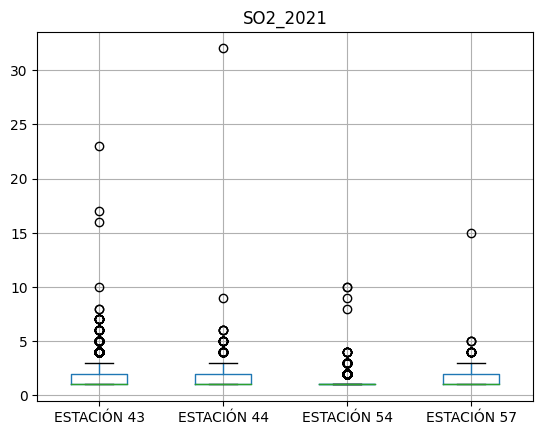

In [ ]:
SO2_2021.boxplot()
plt.title('SO2_2021')

Observamos el comportamiento cuando reemplazamos los nan's extrapolando con el dato anterior. 

Text(0.5, 1.0, 'SO2_2021 extrapolando')

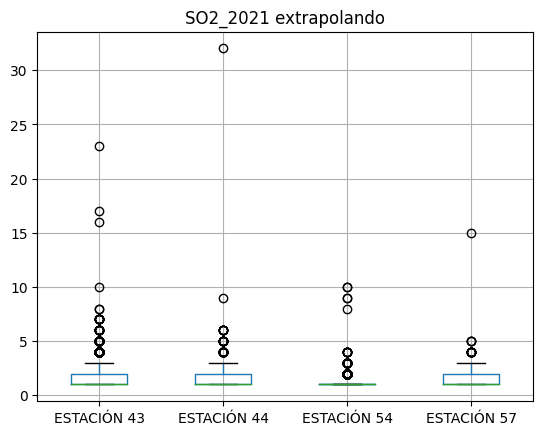

In [ ]:
SO2_2021.fillna(method='ffill',inplace=False).boxplot()
plt.title('SO2_2021 extrapolando')

Implementamos el ciclo  para reemplazar cada dato nan segun fecha y estación con el numero de semana de la fecha y el promedio de la hora. 

In [ ]:
for fecha in SO2_2021.loc[pd.isnull(SO2_2021).any(1)].index:
  for estacion in SO2_2021.loc[fecha].loc[pd.isnull(SO2_2021.loc[fecha])].index:
    SO2_2021[estacion].at[fecha]=SO2_2021_mean[estacion].loc[fecha.week,fecha.hour]

In [ ]:
SO2_2021.isnull().sum()

ESTACIÓN 43    0
ESTACIÓN 44    0
ESTACIÓN 54    0
ESTACIÓN 57    0
dtype: int64

Text(0.5, 1.0, 'SO2_2021')

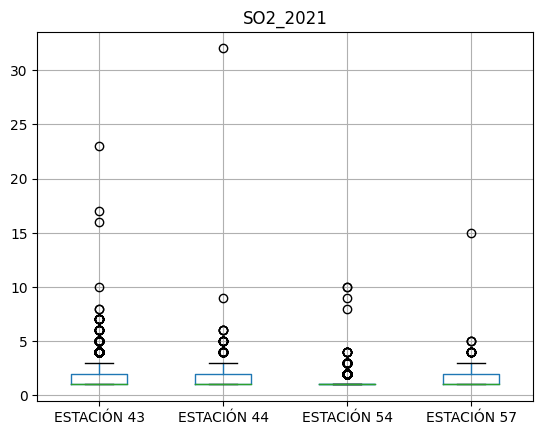

In [ ]:
SO2_2021.boxplot()
plt.title('SO2_2021')

**Conclusiones**
Con el reemplazo de promediados obtenemos mejores resultados en tanto que 'saturamos' los datos outlayers. 

Ahora debemos hacer esto para el resto de codigos contaminantes.

In [ ]:
NO2_2021_mean=NO2_2021.groupby([NO2_2021.index.week, NO2_2021.index.hour]).mean().fillna(method='ffill').round(0)
NOx_2021_mean=NOx_2021.groupby([NOx_2021.index.week, NOx_2021.index.hour]).mean().fillna(method='ffill').round(0)
O3_2021_mean=O3_2021.groupby([O3_2021.index.week, O3_2021.index.hour]).mean().fillna(method='ffill').round(0)
CO_2021_mean=CO_2021.groupby([CO_2021.index.week, CO_2021.index.hour]).mean().fillna(method='ffill').round(0)
PM10_2021_mean=PM10_2021.groupby([PM10_2021.index.week, PM10_2021.index.hour]).mean().fillna(method='ffill').round(0)


for fecha in NO2_2021.loc[pd.isnull(NO2_2021).any(1)].index:
  for estacion in NO2_2021.loc[fecha].loc[pd.isnull(NO2_2021.loc[fecha])].index:
    NO2_2021[estacion].at[fecha]=NO2_2021_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in NOx_2021.loc[pd.isnull(NOx_2021).any(1)].index:
  for estacion in NOx_2021.loc[fecha].loc[pd.isnull(NOx_2021.loc[fecha])].index:
    NOx_2021[estacion].at[fecha]=NOx_2021_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in O3_2021.loc[pd.isnull(O3_2021).any(1)].index:
  for estacion in O3_2021.loc[fecha].loc[pd.isnull(O3_2021.loc[fecha])].index:
    O3_2021[estacion].at[fecha]=O3_2021_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in CO_2021.loc[pd.isnull(CO_2021).any(1)].index:
  for estacion in CO_2021.loc[fecha].loc[pd.isnull(CO_2021.loc[fecha])].index:
    CO_2021[estacion].at[fecha]=CO_2021_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in PM10_2021.loc[pd.isnull(PM10_2021).any(1)].index:
  for estacion in PM10_2021.loc[fecha].loc[pd.isnull(PM10_2021.loc[fecha])].index:
    PM10_2021[estacion].at[fecha]=PM10_2021_mean[estacion].loc[fecha.week,fecha.hour]



<ipython-input-557-e9f27f15e1a1>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  NO2_2021_mean=NO2_2021.groupby([NO2_2021.index.week, NO2_2021.index.hour]).mean().fillna(method='ffill').round(0)
<ipython-input-557-e9f27f15e1a1>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  NOx_2021_mean=NOx_2021.groupby([NOx_2021.index.week, NOx_2021.index.hour]).mean().fillna(method='ffill').round(0)
<ipython-input-557-e9f27f15e1a1>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. 

Comprobamos que efectivamente se hayan reemplazado los valores Nan's para el CO:

In [ ]:
CO_2021.isnull().sum()

ESTACIÓN 43    0
ESTACIÓN 44    0
ESTACIÓN 54    0
ESTACIÓN 57    0
dtype: int64

### any 2022
Resumimos el codigo y lo generalizamos. Cambiamos la ruta de acceso para los datos de 2022.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mDates
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
# !ls "/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1" #CAMBIAR ACORDE A TU DRIVE!!!
all_files = !ls "/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2022/Qualitat de l'aire" #CAMBIAR ACORDE A TU DRIVE!!!
all_files=[filename.split() for filename in all_files]
all_files=np.concatenate(all_files)
# all_files

li = []
for filename in all_files:
  df = pd.read_csv("/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2022/Qualitat de l'aire/" + filename, index_col=None, header=0)
  li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame2=frame.set_index(['ESTACIO','CODI_CONTAMINANT','MES','DIA'])
idx = pd.IndexSlice
# frame2
frame2=frame2.iloc[:,5:]
QA_2022_D = frame2.iloc[:,:-1:2]
# QA_2022_D
frame2['aux']=['aux']*frame2.shape[0]
QA_2022_V = frame2.iloc[:,1:-1:2]
frame2 = frame2.drop('aux',axis=1)


Mounted at /gdrive


Diferencia entre validados y Nan's

In [ ]:
No_validados=QA_2022_V[QA_2022_V.where(QA_2022_V=='N',False).any(1)].replace({'N':True,'V':False}).set_axis([i for i in range(1, 25)],axis=1)
Datos_nulos=pd.isnull(QA_2022_D.loc[pd.isnull(QA_2022_D).any(1)]).set_axis([i for i in range(1, 25)],axis=1)
No_validados.compare(Datos_nulos)

ESTACIO,CODI_CONTAMINANT,MES,DIA


In [ ]:
QA_2022_D

H01   H02   H03   H04   H05   H06   H07  \
ESTACIO CODI_CONTAMINANT MES DIA                                             
4       7                1   1    57.0  52.0  34.0  22.0  18.0  18.0  14.0   
                             2    24.0  16.0   6.0  10.0  11.0  10.0   9.0   
                             3    15.0  13.0  10.0   6.0   7.0   8.0  17.0   
                             4    43.0  25.0   1.0   1.0   2.0   2.0   8.0   
                             5    27.0  12.0   1.0   1.0   3.0   1.0   2.0   
...                                ...   ...   ...   ...   ...   ...   ...   
58      14               12  27   57.0  55.0  61.0  62.0  66.0  65.0  61.0   
                             28   70.0  65.0  62.0  60.0  61.0  66.0  70.0   
                             29   72.0  72.0  73.0  68.0  67.0  67.0  64.0   
                             30   62.0  60.0  59.0  59.0  60.0  64.0  64.0   
                             31   55.0  56.0  58.0  58.0  59.0  59.0  63.0   

                                   H08   H09    H10  ...   H15   H16   H17  \
ESTACIO CODI_CONTAMINANT MES DIA                     ...                     
4       7                1   1    17.0  22.0   15.0  ...   5.0   4.0   3.0   
                             2    12.0  12.0   19.0  ...   4.0   2.0   1.0   
                             3    35.0  63.0   75.0  ...  11.0   6.0   6.0   
                             4    18.0  84.0  115.0  ...  40.0  39.0  24.0   
                             5     3.0  12.0    7.0  ...   5.0   5.0   3.0   
...                                ...   ...    ...  ...   ...   ...   ...   
58      14               12  27   67.0  65.0   61.0  ...  67.0  69.0  69.0   
                             28   70.0  71.0   71.0  ...  54.0  57.0  51.0   
                             29   63.0  63.0   60.0  ...  64.0  64.0  65.0   
                             30   62.0  67.0   67.0  ...  59.0  60.0  58.0   
                             31   65.0  68.0   69.0  ...  57.0  58.0  59.0   

                                   H18   H19   H20   H21   H22   H23   H24  
ESTACIO CODI_CONTAMINANT MES DIA                                            
4       7                1   1     2.0   1.0   1.0   4.0  16.0  27.0  28.0  
                             2     1.0   2.0   1.0   1.0   1.0   5.0  18.0  
                             3     8.0   8.0   6.0  13.0  22.0  27.0  13.0  
                             4    20.0  23.0  26.0  54.0  21.0  22.0  13.0  
                             5    12.0   4.0   3.0   8.0   6.0   8.0  11.0  
...                                ...   ...   ...   ...   ...   ...   ...  
58      14               12  27   67.0  70.0  68.0  68.0  66.0  70.0  70.0  
                             28   55.0  65.0  72.0  72.0  70.0  65.0  70.0  
                             29   60.0  62.0  61.0  63.0  64.0  64.0  61.0  
                             30   56.0  52.0  49.0  50.0  52.0  53.0  54.0  
                             31   64.0  74.0  79.0  82.0  82.0  77.0  75.0  

[23129 rows x 24 columns]

Observemos la primera diferencia de los datos, mientras que para el año 2021 solo obteniamos 19118 entradas, para el año 2022 presentamos 23129. Esto nos puede indicar que para el año 2022 no se presento problema en ningun dia del año y se registraron todas las horas, incluyendo datos nulos.

In [ ]:
len(np.concatenate(QA_2022_D.loc[idx[4,7,:,:]].values))

8760

8760 son las horas que hay en un año, una vez mas confirmando que para el caso de los datos del año 2022 no hubo problemas de registro como en el año 2021

In [ ]:
# for estacio in QA_2022_D.index.levels[0]:
#   for codi in QA_2022_D.loc[idx[estacio]].index.get_level_values(0).unique():
#     QA_2022_D.loc[idx[estacio,codi,11,8]]=[np.nan]*24
# QA_2022_D.sort_index(inplace=True)

Este codigo comentado no hace falta aplicarlo, ya que su objetivo era crear el dato faltante para el 8 de noviembre en los datos del año 2021.

Construimos los diccionarios que agrupan cada contaminante y sus respectivas estaciones. 

In [ ]:
NO_2022={
        'ESTACIÓN 4':np.concatenate(QA_2022_D.loc[idx[4,7,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,7,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,7,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,7,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,7,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,7,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,7,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,7,:,:]].values)
} 

SO2_2022={ 
      #'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4,1,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,1,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,1,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,1,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,1,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,1,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,1,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,1,:,:]].values)
}

NO2_2022={
      'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4,8,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,8,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,8,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,8,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,8,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,8,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,8,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,8,:,:]].values)
}

PM2_5_2022	={
      #'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4,9,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,9,:,:]].values), 
      #'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,9,:,:]].values),
      #'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,9,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,9,:,:]].values),
      #'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,9,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,9,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,9,:,:]].values)
}

NOx_2022	={
      'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4, 12,:,:]].values),
      'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,12,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,12,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,12,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,12,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,12,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,12,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,12,:,:]].values)
}

O3_2022={
      #'ESTACIÓN 4': np.concatenate(QA_2022_D.loc[idx[4, 14,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,14,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,14,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,14,:,:]].values),
      'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,14,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,14,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,14,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,14,:,:]].values)
}

CO_2022={
      #'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4, 6,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,6,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,6,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,6,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,6,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,6,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,6,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,6,:,:]].values)
}

PM10_2022={
      'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4, 10,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,10,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,10,:,:]].values),
      'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,10,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,10,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,10,:,:]].values),
      'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,10,:,:]].values),
      'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,10,:,:]].values)
}


BC_2022	={
    #'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4, 22,:,:]].values),
    #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,22,:,:]].values), 
    'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,22,:,:]].values),
    #'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,22,:,:]].values),
    #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,22,:,:]].values),
    'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,22,:,:]].values),
    #'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,22,:,:]].values),
   # 'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,22,:,:]].values)
}

BBC_2022		={
      #'ESTACIÓN 4':  np.concatenate(QA_2022_D.loc[idx[4, 999,:,:]].values),
      #'ESTACIÓN 42': np.concatenate(QA_2022_D.loc[idx[42,999,:,:]].values), 
      'ESTACIÓN 43': np.concatenate(QA_2022_D.loc[idx[43,999,:,:]].values),
      #'ESTACIÓN 44': np.concatenate(QA_2022_D.loc[idx[44,999,:,:]].values),
      #'ESTACIÓN 50': np.concatenate(QA_2022_D.loc[idx[50,999,:,:]].values),
      'ESTACIÓN 54': np.concatenate(QA_2022_D.loc[idx[54,999,:,:]].values),
      #'ESTACIÓN 57': np.concatenate(QA_2022_D.loc[idx[57,999,:,:]].values),
      #'ESTACIÓN 58': np.concatenate(QA_2022_D.loc[idx[58,999,:,:]].values)
          }

Generamos el dataframe de cada diccionario.

In [ ]:
SO2_2022=pd.DataFrame(SO2_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
NO2_2022=pd.DataFrame(NO2_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
# PM2_5_2022=pd.DataFrame(PM2_5_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H')) #problematica
NOx_2022=pd.DataFrame(NOx_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
O3_2022=pd.DataFrame(O3_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
CO_2022=pd.DataFrame(CO_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
PM10_2022=pd.DataFrame(PM10_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H'))
# BC_2022=pd.DataFrame(BC_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H')) #problematica
# BBC_2022=pd.DataFrame(BBC_2022,index=pd.date_range(start='2022-01-01', periods=8760, freq='H')) #problematica

Reemplazamos los valores nulos.

In [ ]:
SO2_2022_mean=SO2_2022.groupby([SO2_2022.index.week, SO2_2022.index.hour]).mean().fillna(method='ffill')
NO2_2022_mean=NO2_2022.groupby([NO2_2022.index.week, NO2_2022.index.hour]).mean().fillna(method='ffill')
NOx_2022_mean=NOx_2022.groupby([NOx_2022.index.week, NOx_2022.index.hour]).mean().fillna(method='ffill')
O3_2022_mean=O3_2022.groupby([O3_2022.index.week, O3_2022.index.hour]).mean().fillna(method='ffill')
CO_2022_mean=CO_2022.groupby([CO_2022.index.week, CO_2022.index.hour]).mean().fillna(method='ffill')
PM10_2022_mean=PM10_2022.groupby([PM10_2022.index.week, PM10_2022.index.hour]).mean().fillna(method='ffill')

for fecha in SO2_2022.loc[pd.isnull(SO2_2022).any(1)].index:
  for estacion in SO2_2022.loc[fecha].loc[pd.isnull(SO2_2022.loc[fecha])].index:
    SO2_2022[estacion].at[fecha]=SO2_2022_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in NO2_2022.loc[pd.isnull(NO2_2022).any(1)].index:
  for estacion in NO2_2022.loc[fecha].loc[pd.isnull(NO2_2022.loc[fecha])].index:
    NO2_2022[estacion].at[fecha]=NO2_2022_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in NOx_2022.loc[pd.isnull(NOx_2022).any(1)].index:
  for estacion in NOx_2022.loc[fecha].loc[pd.isnull(NOx_2022.loc[fecha])].index:
    NOx_2022[estacion].at[fecha]=NOx_2022_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in O3_2022.loc[pd.isnull(O3_2022).any(1)].index:
  for estacion in O3_2022.loc[fecha].loc[pd.isnull(O3_2022.loc[fecha])].index:
    O3_2022[estacion].at[fecha]=O3_2022_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in CO_2022.loc[pd.isnull(CO_2022).any(1)].index:
  for estacion in CO_2022.loc[fecha].loc[pd.isnull(CO_2022.loc[fecha])].index:
    CO_2022[estacion].at[fecha]=CO_2022_mean[estacion].loc[fecha.week,fecha.hour]

for fecha in PM10_2022.loc[pd.isnull(PM10_2022).any(1)].index:
  for estacion in PM10_2022.loc[fecha].loc[pd.isnull(PM10_2022.loc[fecha])].index:
    PM10_2022[estacion].at[fecha]=PM10_2022_mean[estacion].loc[fecha.week,fecha.hour]


<ipython-input-566-821605673adb>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  SO2_2022_mean=SO2_2022.groupby([SO2_2022.index.week, SO2_2022.index.hour]).mean().fillna(method='ffill')
<ipython-input-566-821605673adb>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  NO2_2022_mean=NO2_2022.groupby([NO2_2022.index.week, NO2_2022.index.hour]).mean().fillna(method='ffill')
<ipython-input-566-821605673adb>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reprodu

In [ ]:
NO2_2022.shape

(8760, 8)

Observemos si hay queda algun dato Nan para el Nox del año 2022:

In [ ]:
NOx_2022.isnull().sum()

ESTACIÓN 4     0
ESTACIÓN 42    0
ESTACIÓN 43    0
ESTACIÓN 44    0
ESTACIÓN 50    0
ESTACIÓN 54    0
ESTACIÓN 57    0
ESTACIÓN 58    0
dtype: int64

 **Normalización y gráficas**

*   2021



In [ ]:
SO2_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/SO2_2021.csv')
NO2_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/NO2_2021.csv')
NOx_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/NOx_2021.csv')
O3_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/O3_2021.csv')
CO_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/CO_2021.csv')
PM10_2021.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/PM10_2021.csv')

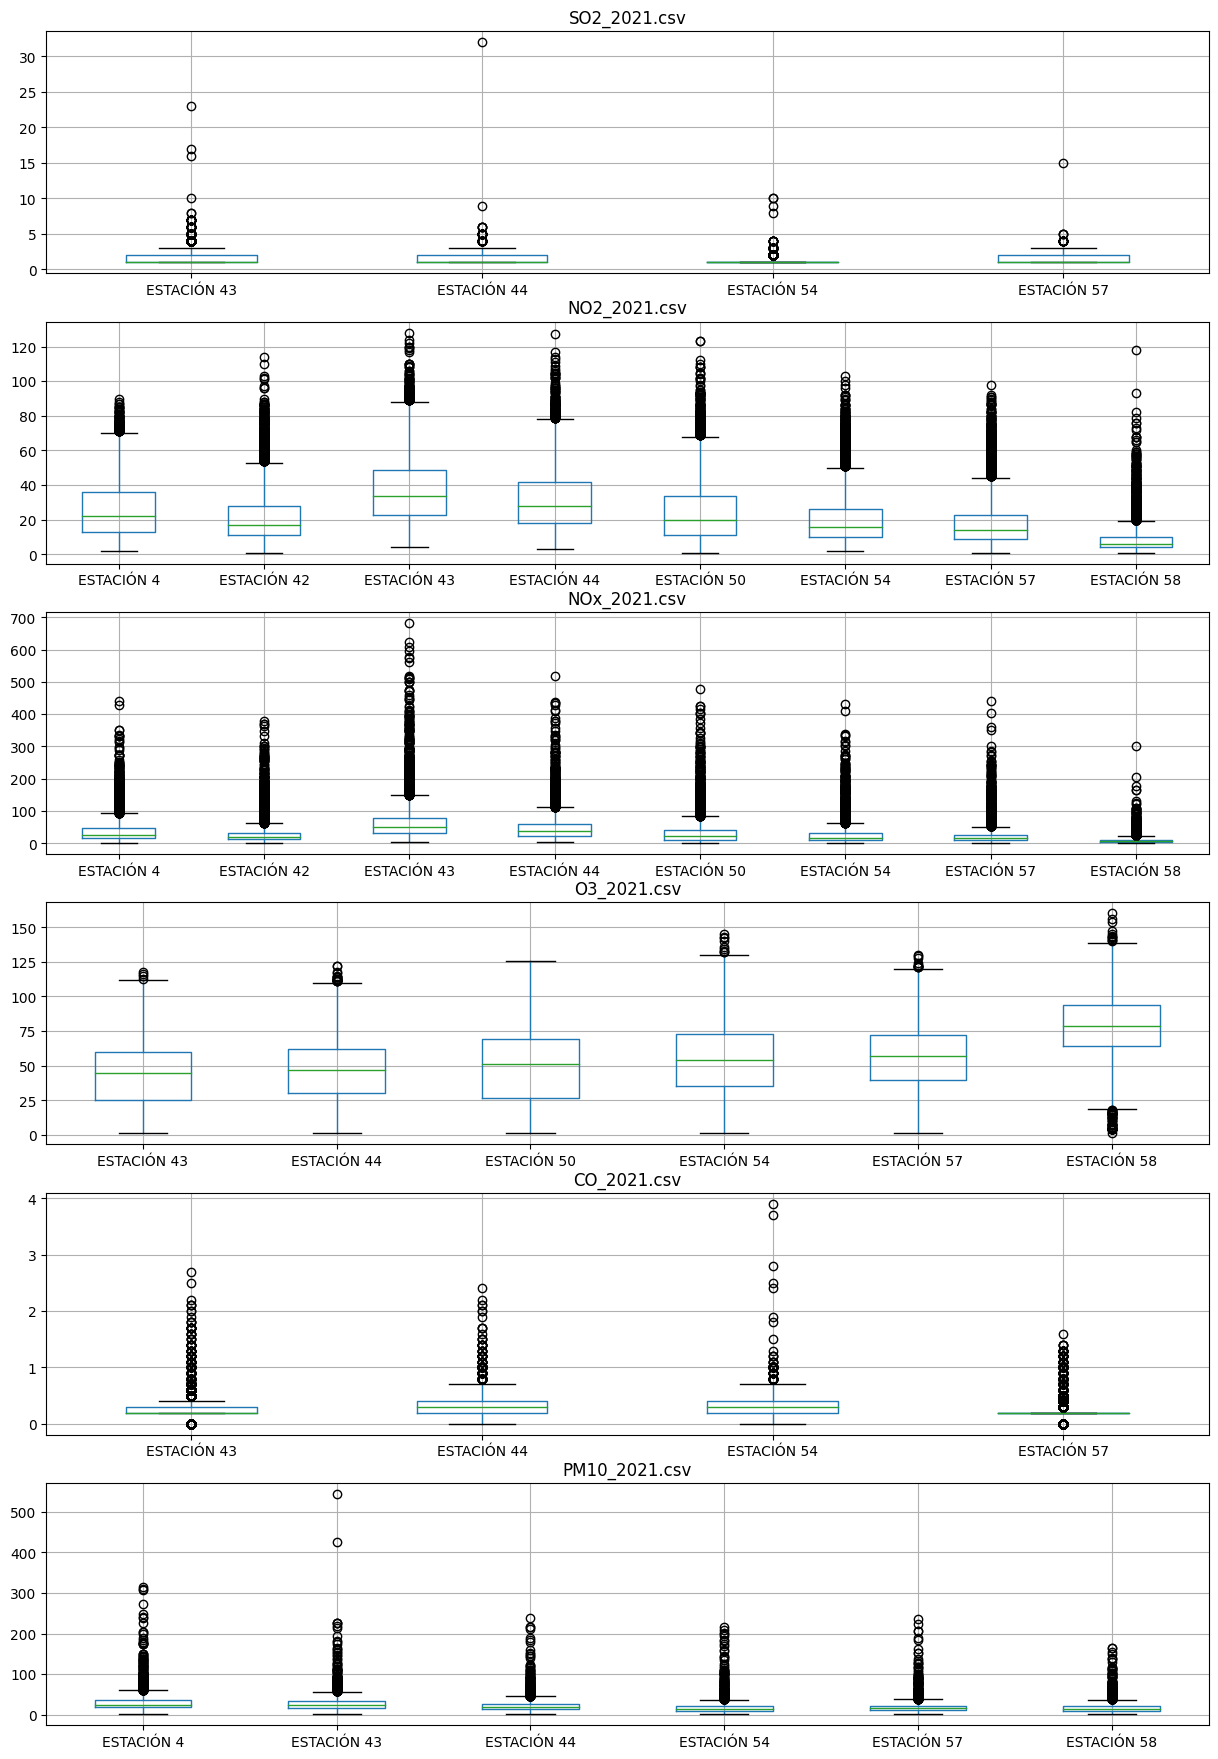

In [ ]:
name_cont=['SO2_2021.csv','NO2_2021.csv','NOx_2021.csv','O3_2021.csv','CO_2021.csv','PM10_2021.csv']
n=1
plt.figure(figsize=(15, 22))
for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/" + name, index_col=None, header=0)
  plt.subplot(6,1,n)
  x.boxplot()
  plt.title(name)
  n=n+1

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2021/" + name, index_col=None, header=0)
  x = x.set_index('Unnamed: 0')
  [a,b]=x.shape
  nrm = MinMaxScaler() 
  nrm.fit(x)
  x.iloc[:,:b]= pd.DataFrame(nrm.transform(x.iloc[:,:b]),
                              columns=x.columns[:b],
                              index=x.index)
  x.to_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/"  + name)

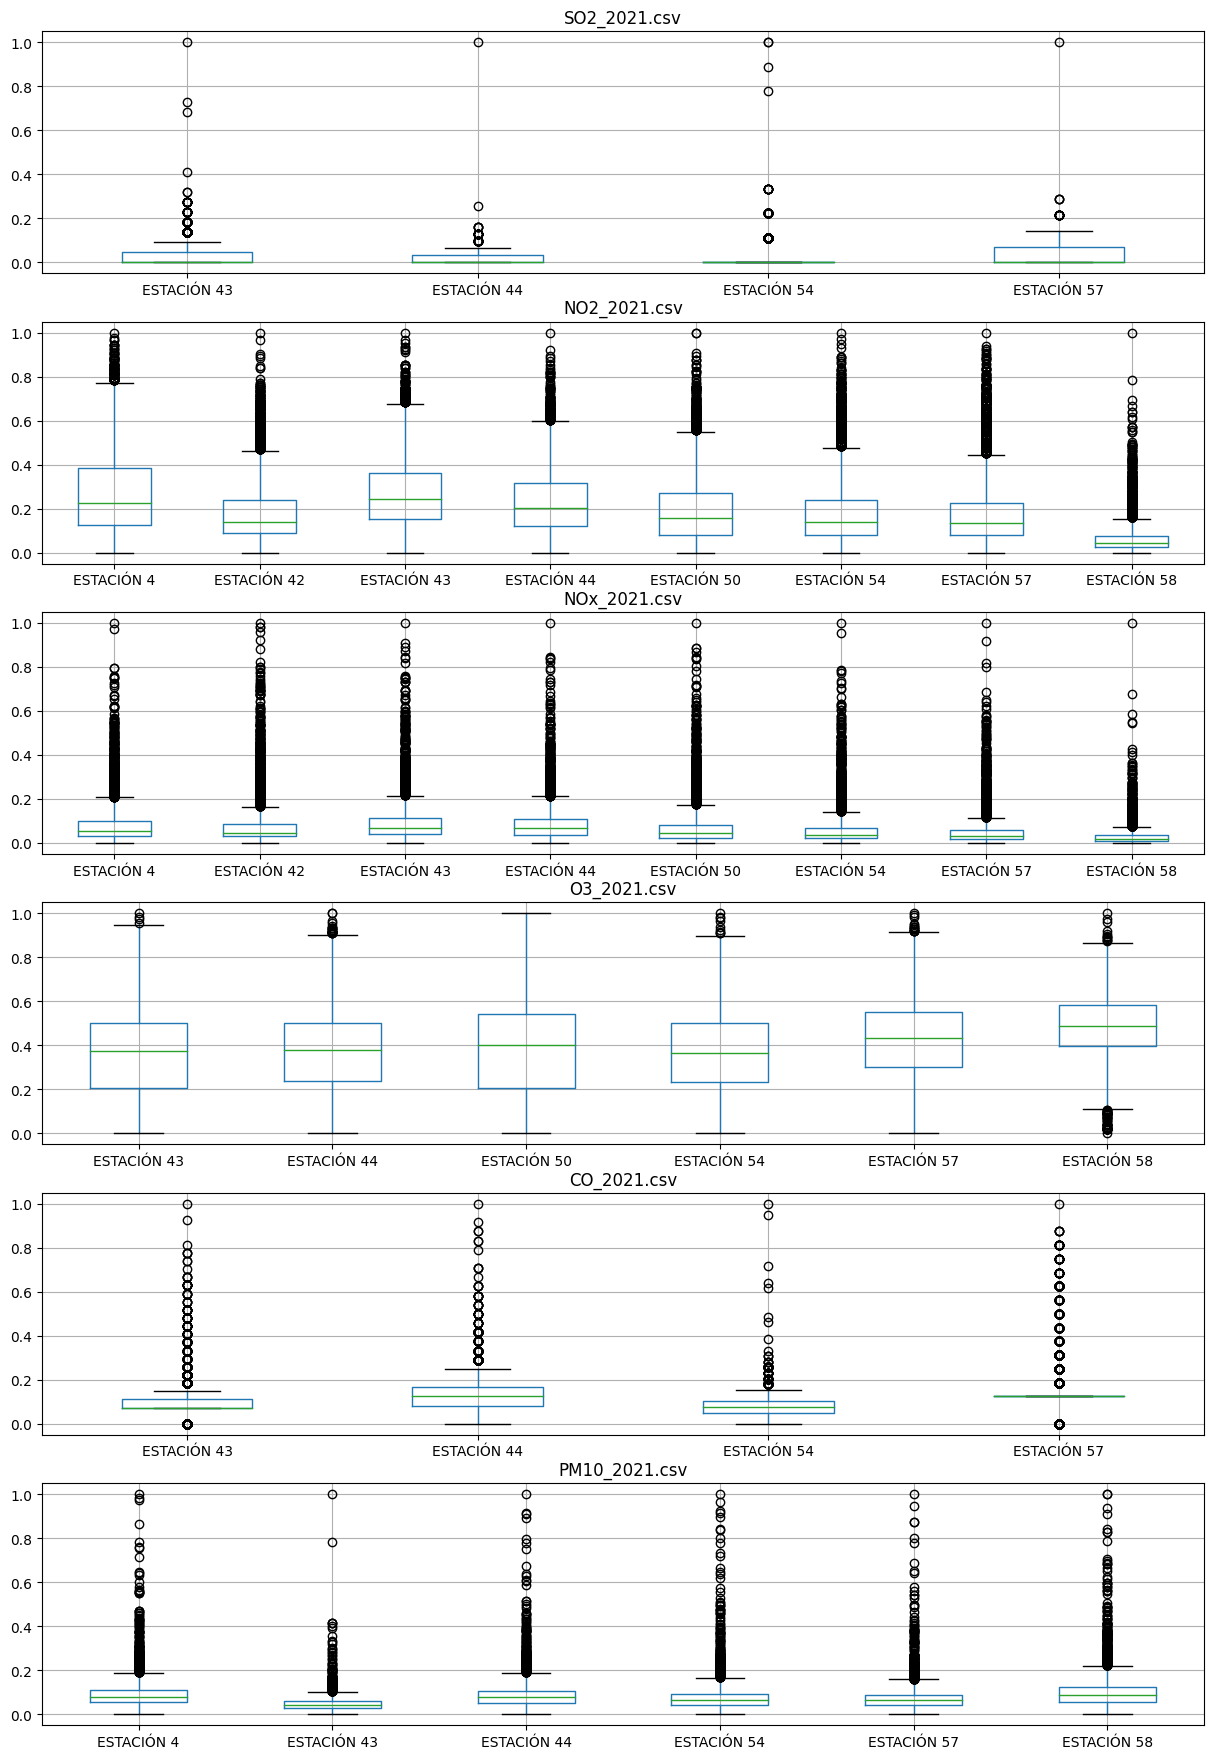

In [ ]:
n=1
plt.figure(figsize=(15, 22))
for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/" + name, index_col=None, header=0)
  plt.subplot(6,1,n)
  x.boxplot()
  plt.title(name)
  n=n+1

*   2022



In [ ]:
SO2_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/SO2_2022.csv')
NO2_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/NO2_2022.csv')
NOx_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/NOx_2022.csv')
O3_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/O3_2022.csv')
CO_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/CO_2022.csv')
PM10_2022.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/PM10_2022.csv')

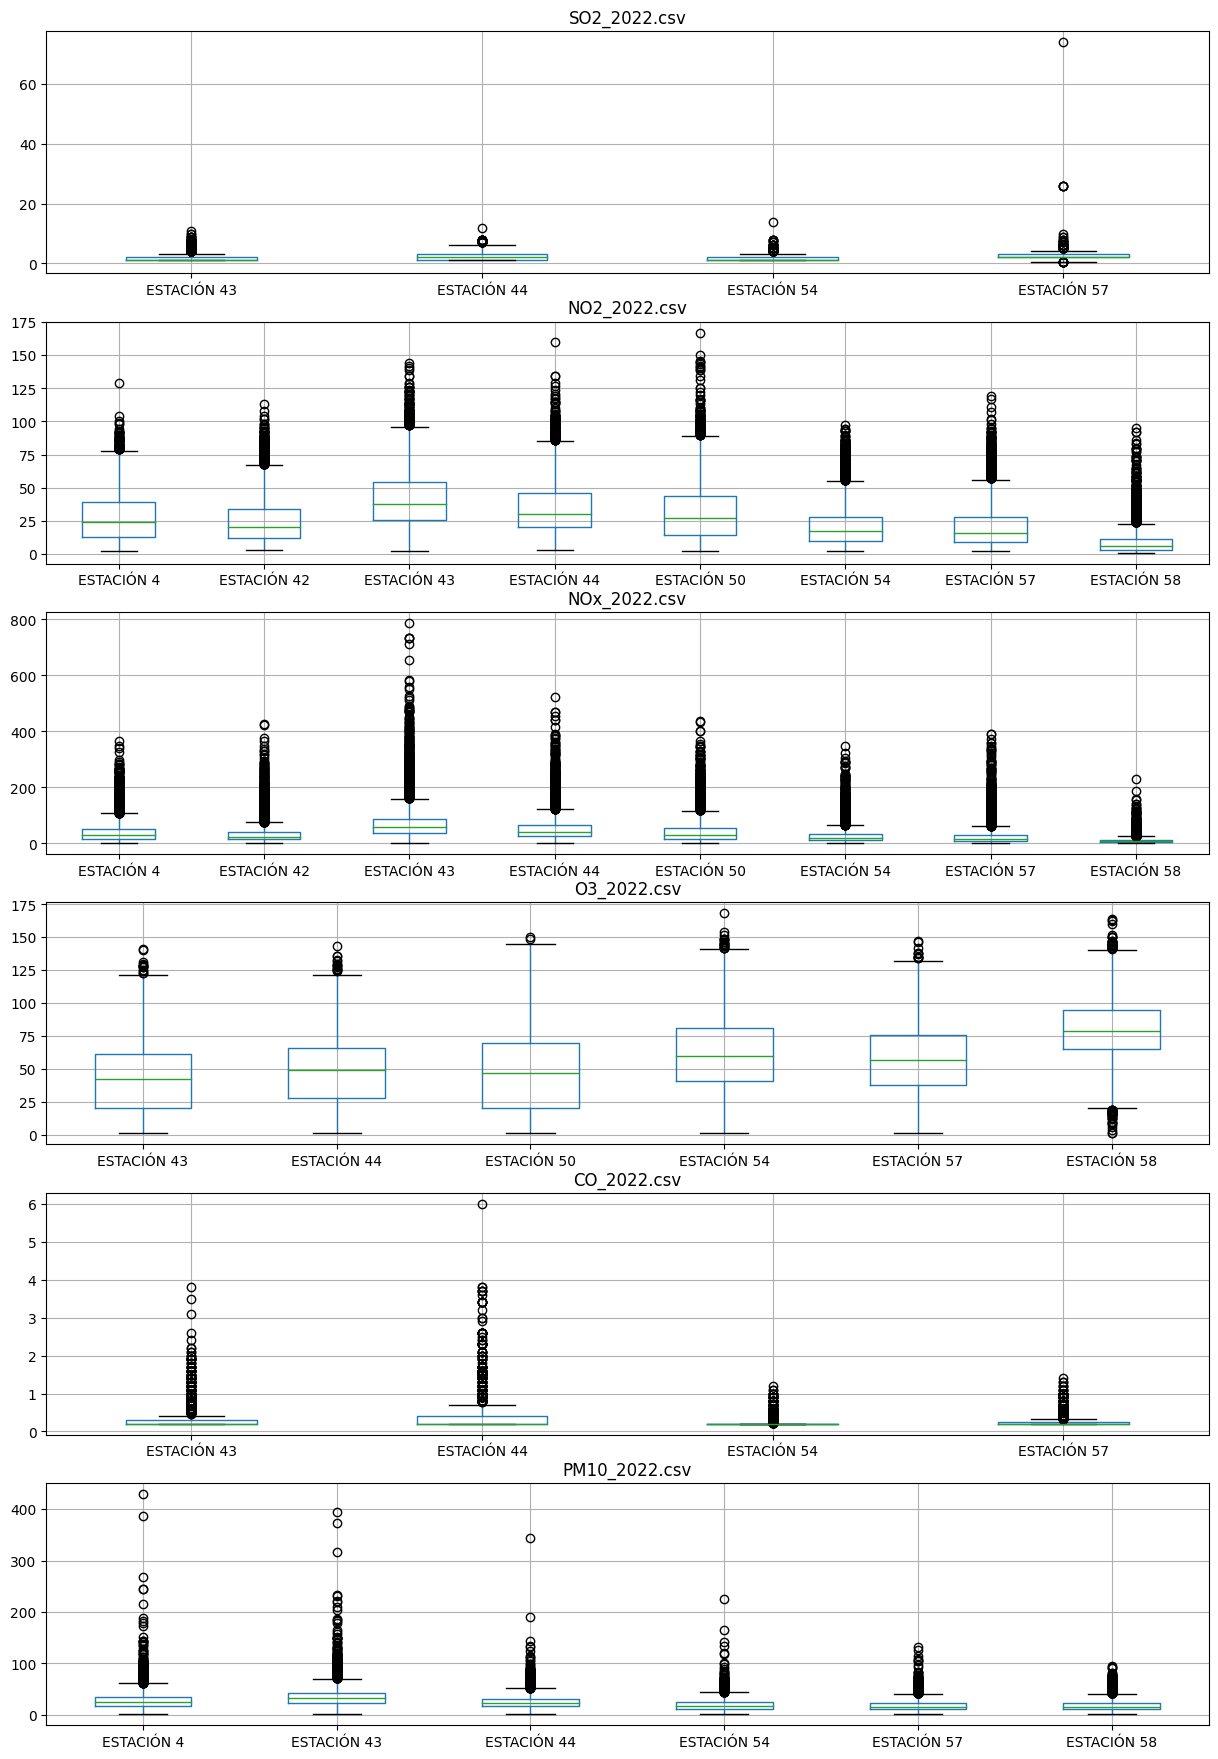

In [ ]:
name_cont=['SO2_2022.csv','NO2_2022.csv','NOx_2022.csv','O3_2022.csv','CO_2022.csv','PM10_2022.csv']
n=1
plt.figure(figsize=(15, 22))
for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/" + name, index_col=None, header=0)
  plt.subplot(6,1,n)
  x.boxplot()
  plt.title(name)
  n=n+1

In [ ]:
for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos limpios/2022/" + name, index_col=None, header=0)
  x = x.set_index('Unnamed: 0')
  [a,b]=x.shape
  nrm = MinMaxScaler() 
  nrm.fit(x)
  x.iloc[:,:b]= pd.DataFrame(nrm.transform(x.iloc[:,:b]),
                              columns=x.columns[:b],
                              index=x.index)
  x.to_csv('/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/' + name)

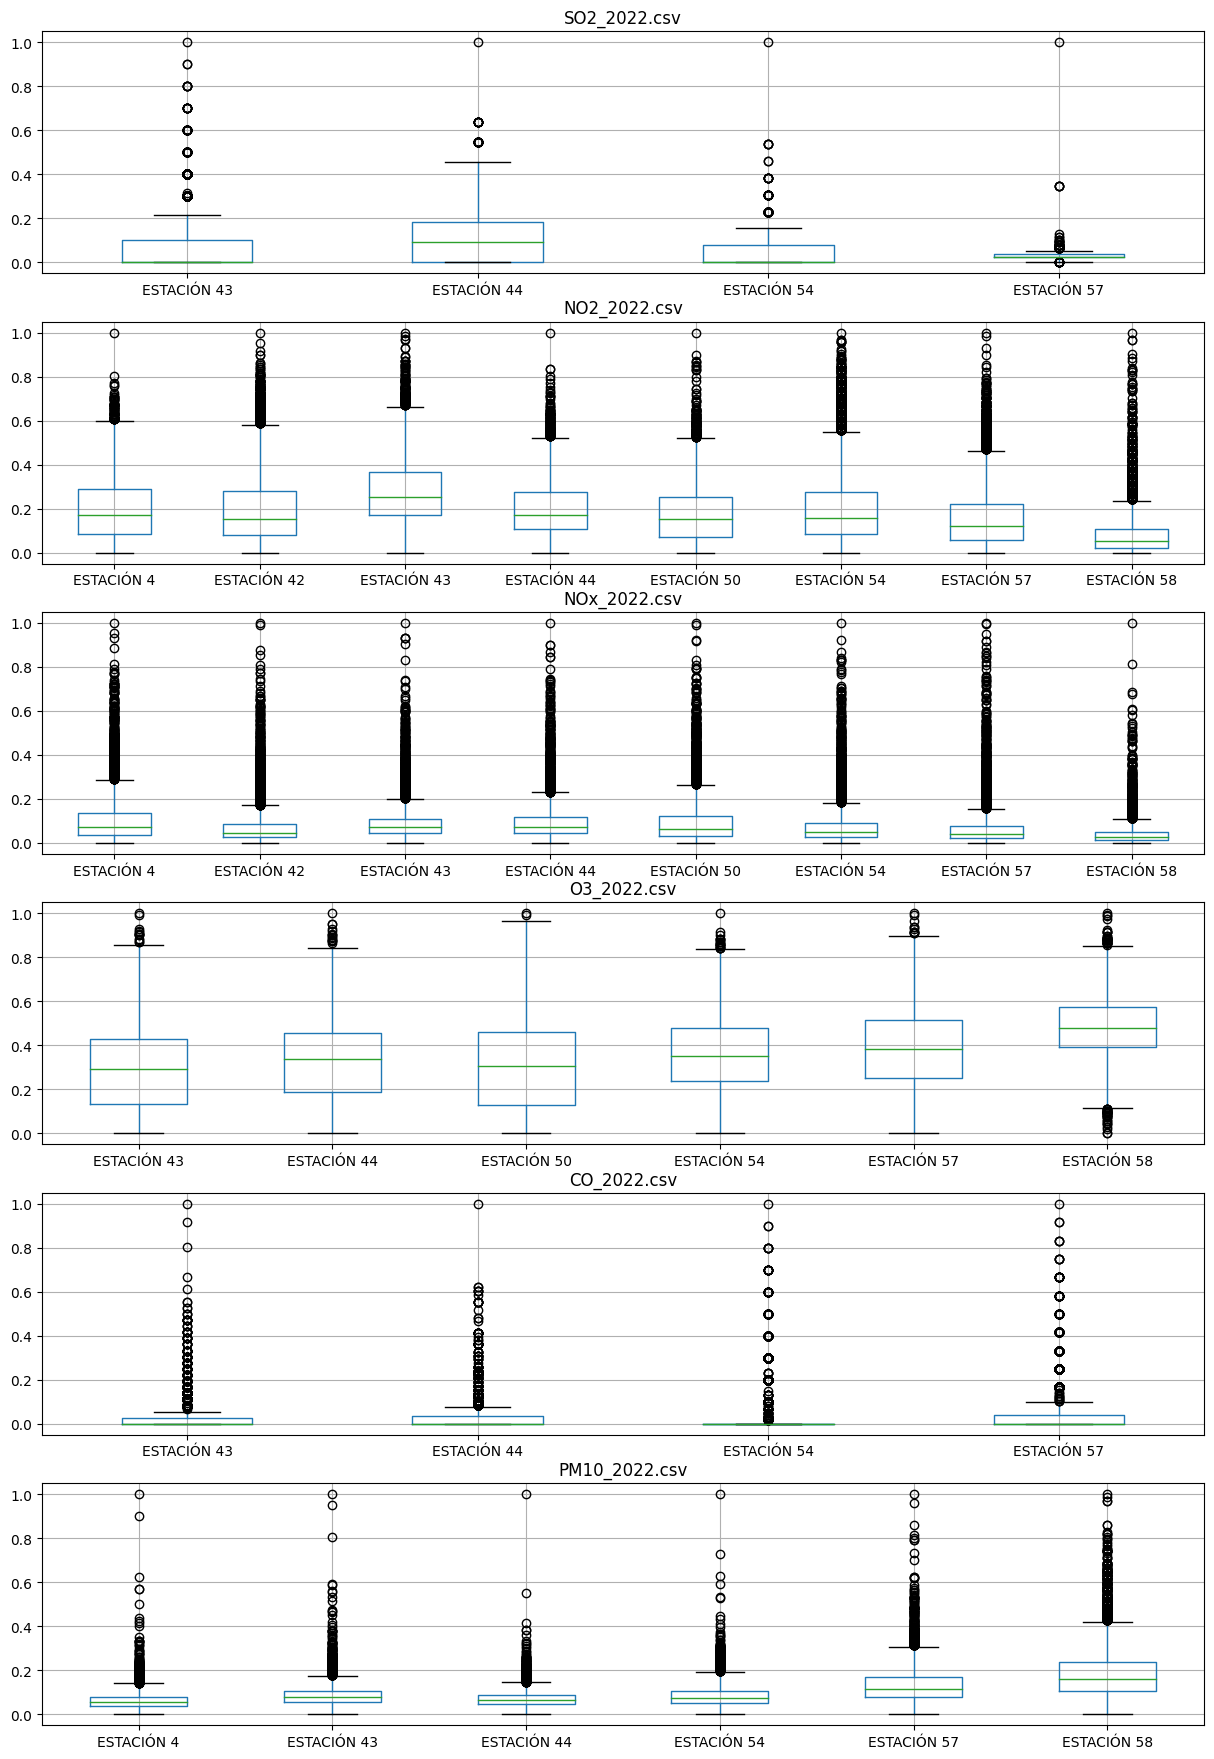

In [ ]:
n=1
plt.figure(figsize=(15, 22))
for name in name_cont:
  x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/" + name, index_col=None, header=0)
  plt.subplot(6,1,n)
  x.boxplot()
  plt.title(name)
  n=n+1

**Gráficas**

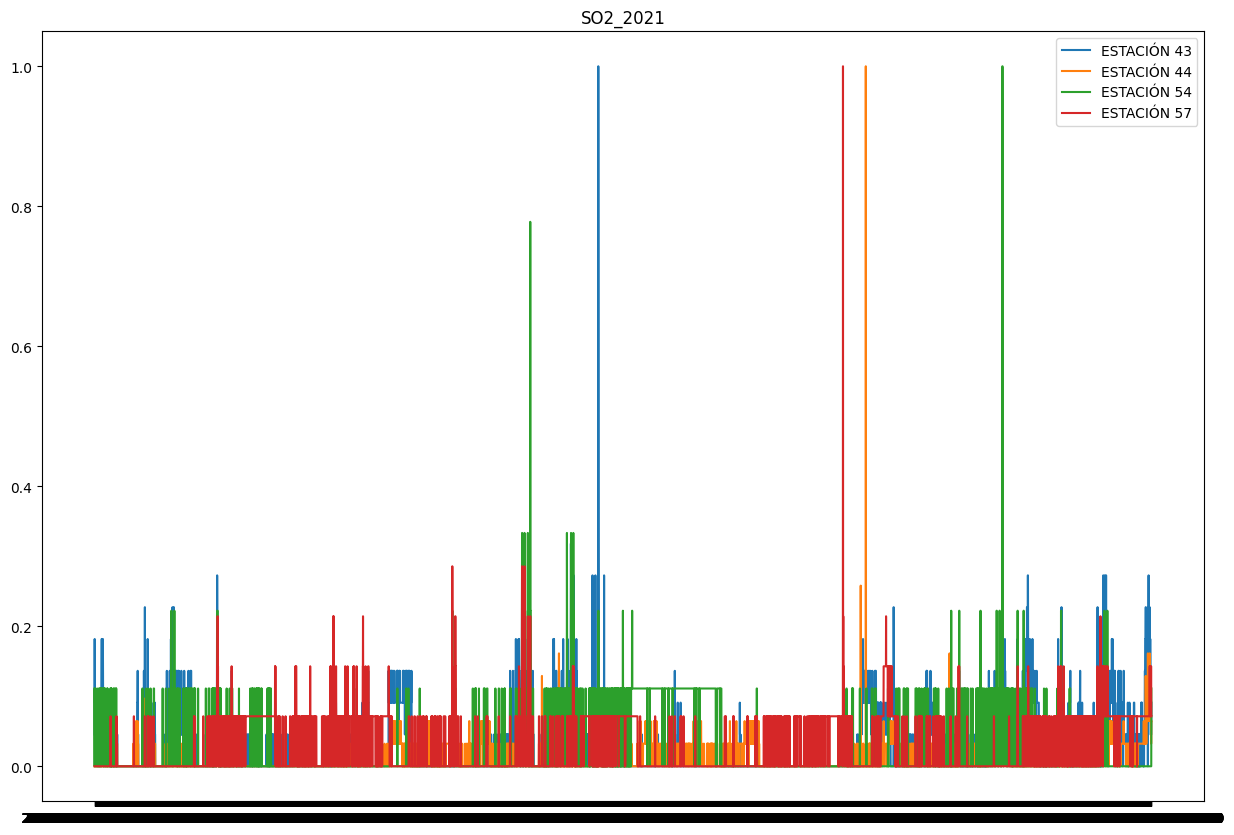

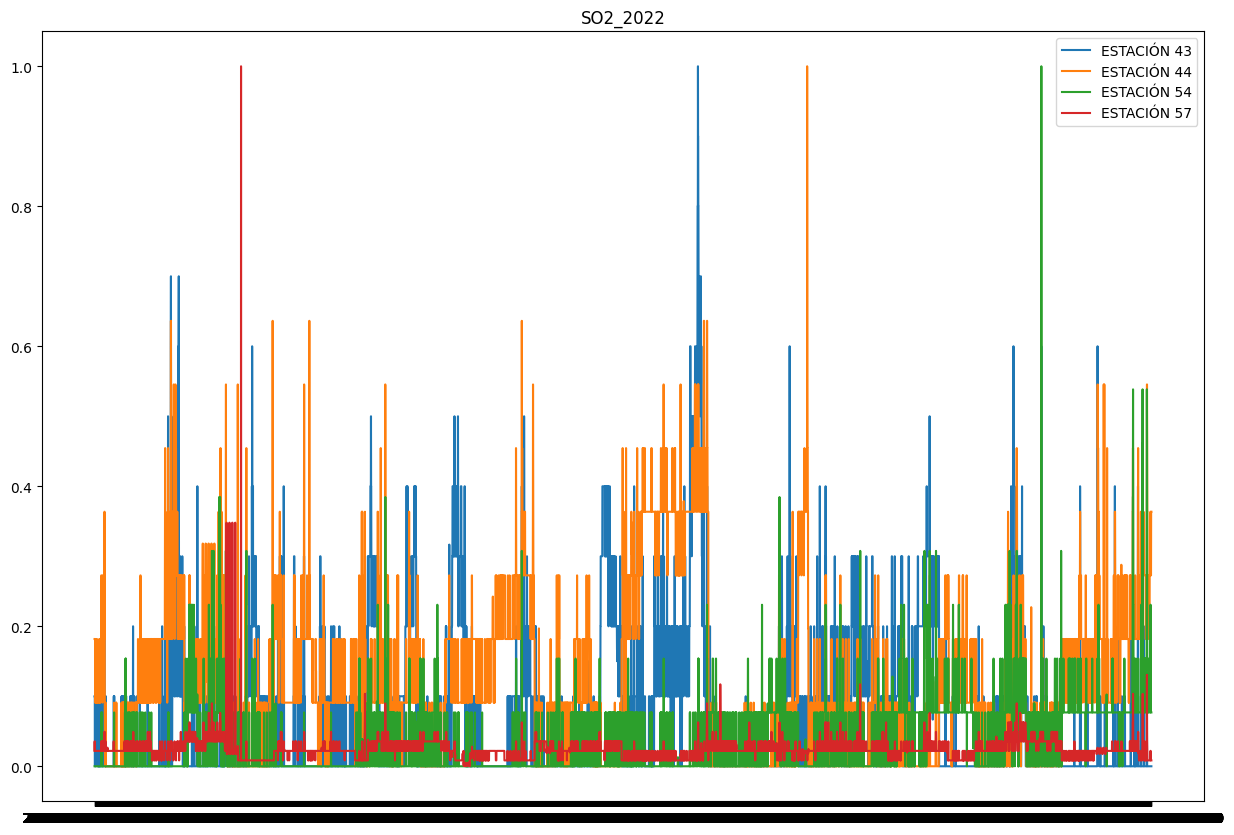

In [ ]:
plt.figure(figsize=(15, 22))
plt.subplot(2,1,1)
x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/SO2_2021.csv", index_col=None, header=0)
y=x.columns
[a,b]=x.shape
for n in range(1,b):
  plt.plot(x['Unnamed: 0'], x.iloc[:,n])
plt.title('SO2_2021')
plt.legend(y[1:])


plt.figure(figsize=(15, 22))
plt.subplot(2,1,2)
x2 = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/SO2_2022.csv", index_col=None, header=0)
y2=x2.columns
[a,b]=x2.shape
for n in range(1,b):
  plt.plot(x2['Unnamed: 0'], x2.iloc[:,n])
plt.title('SO2_2022')
plt.legend(y2[1:])

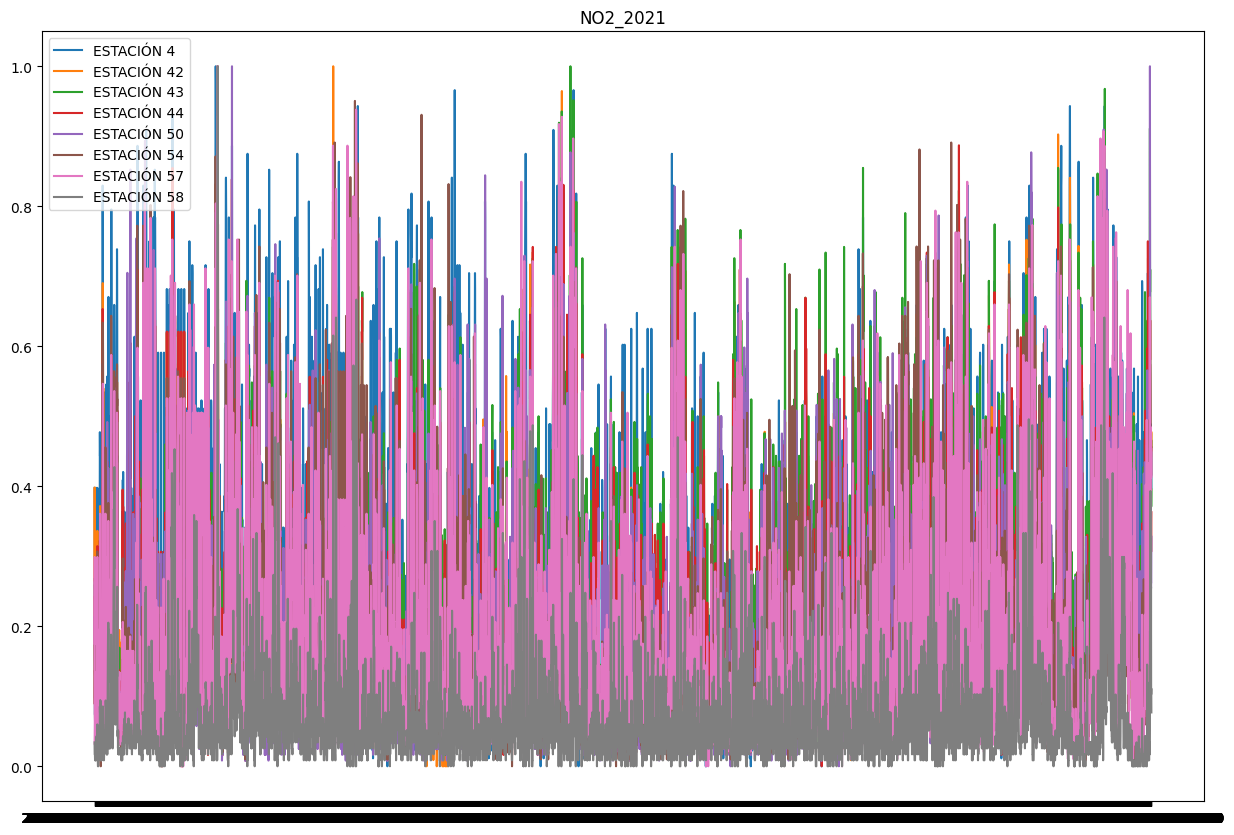

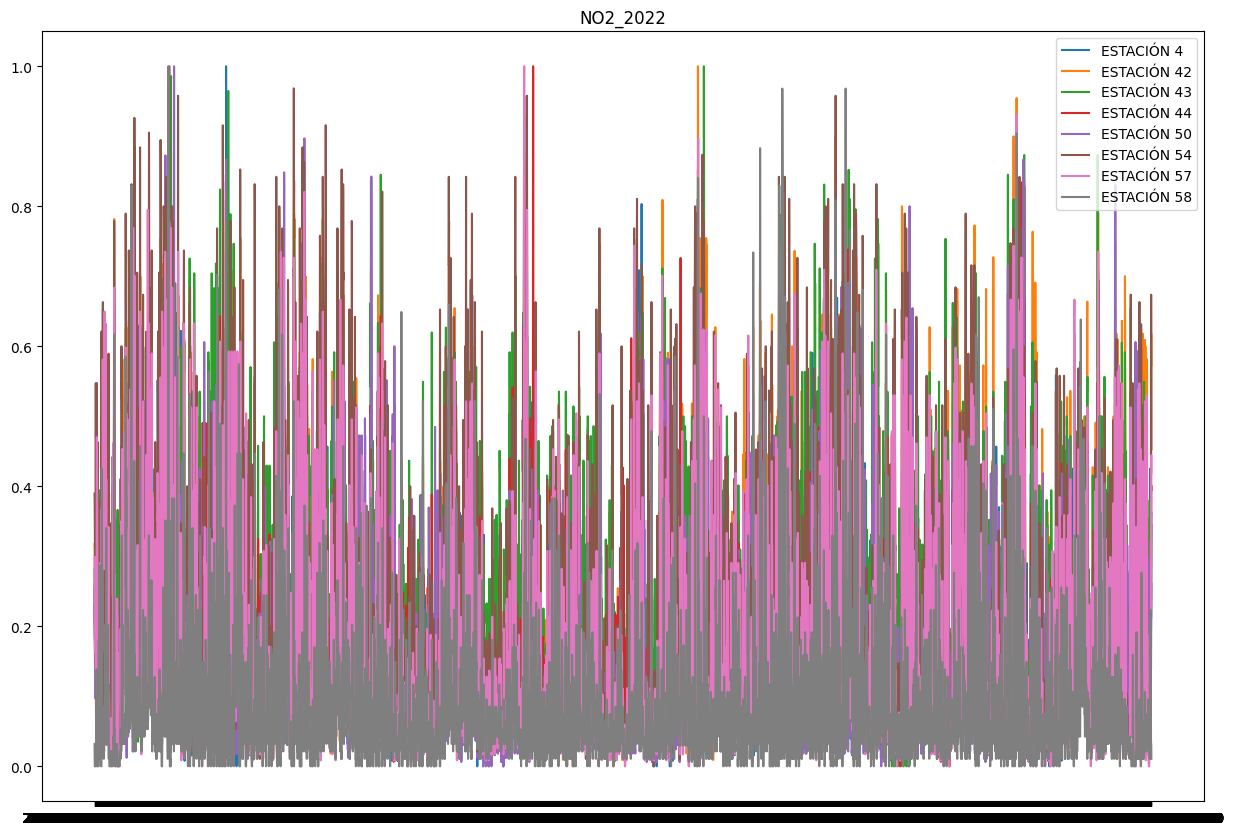

In [ ]:
plt.figure(figsize=(15, 22))
plt.subplot(2,1,1)
x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/NO2_2021.csv", index_col=None, header=0)
y=x.columns
[a,b]=x.shape
for n in range(1,b):
  plt.plot(x['Unnamed: 0'], x.iloc[:,n])
plt.title('NO2_2021')
plt.legend(y[1:])


plt.figure(figsize=(15, 22))
plt.subplot(2,1,2)
x2 = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/NO2_2022.csv", index_col=None, header=0)
y2=x2.columns
[a,b]=x2.shape
for n in range(1,b):
  plt.plot(x2['Unnamed: 0'], x2.iloc[:,n])
plt.title('NO2_2022')
plt.legend(y2[1:])

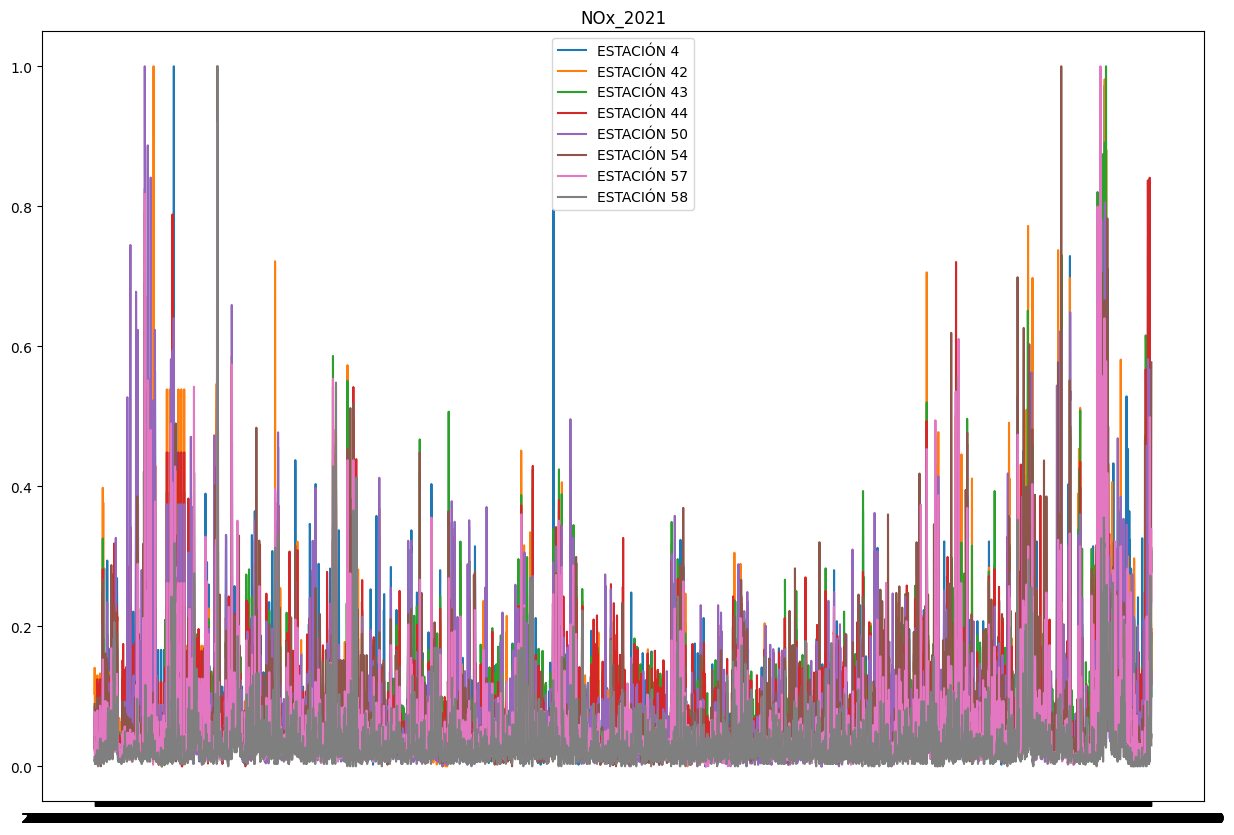

In [ ]:
plt.figure(figsize=(15, 22))
plt.subplot(2,1,1)
x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/NOx_2021.csv", index_col=None, header=0)
y=x.columns
[a,b]=x.shape
for n in range(1,b):
  plt.plot(x['Unnamed: 0'], x.iloc[:,n])
plt.title('NOx_2021')
plt.legend(y[1:])


plt.figure(figsize=(15, 22))
plt.subplot(2,1,2)
x2 = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/NOx_2022.csv", index_col=None, header=0)
y2=x2.columns
[a,b]=x2.shape
for n in range(1,b):
  plt.plot(x2['Unnamed: 0'], x2.iloc[:,n])
plt.title('NOx_2022')
plt.legend(y2[1:])

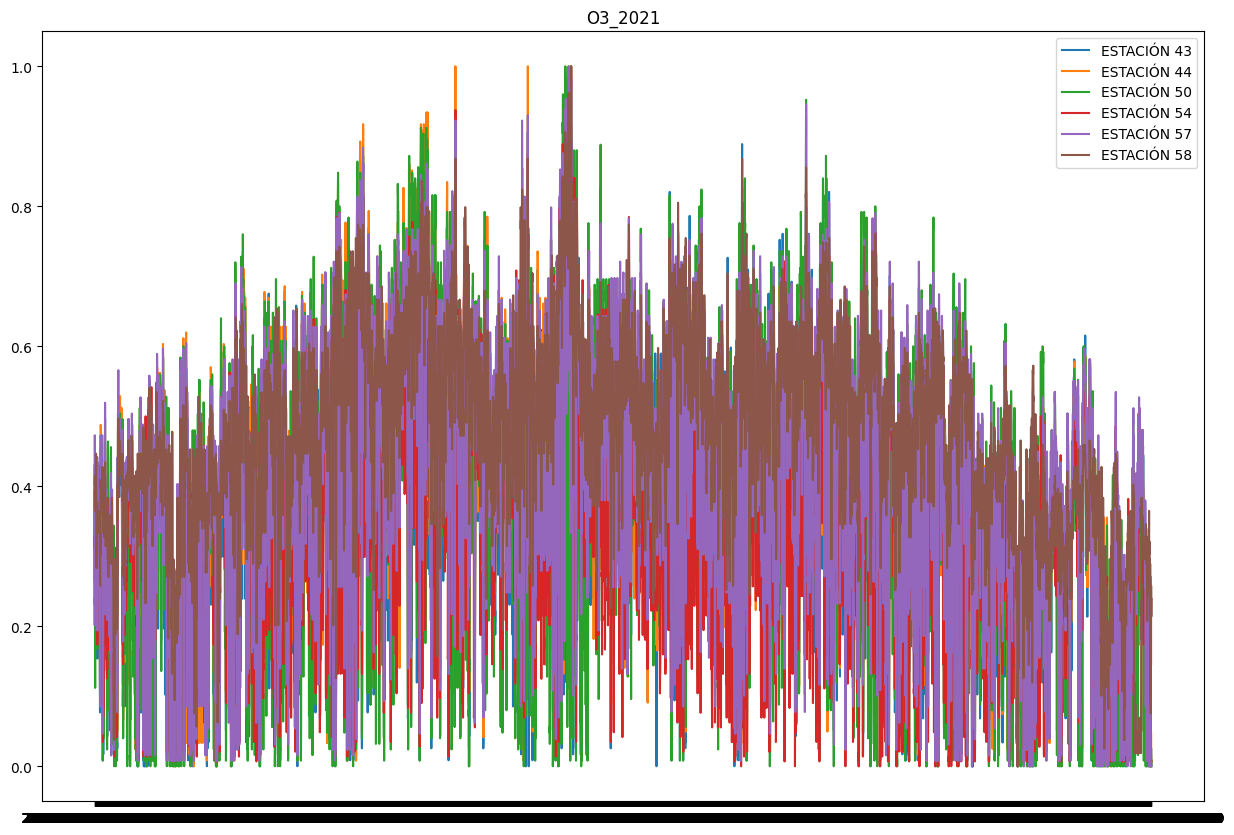

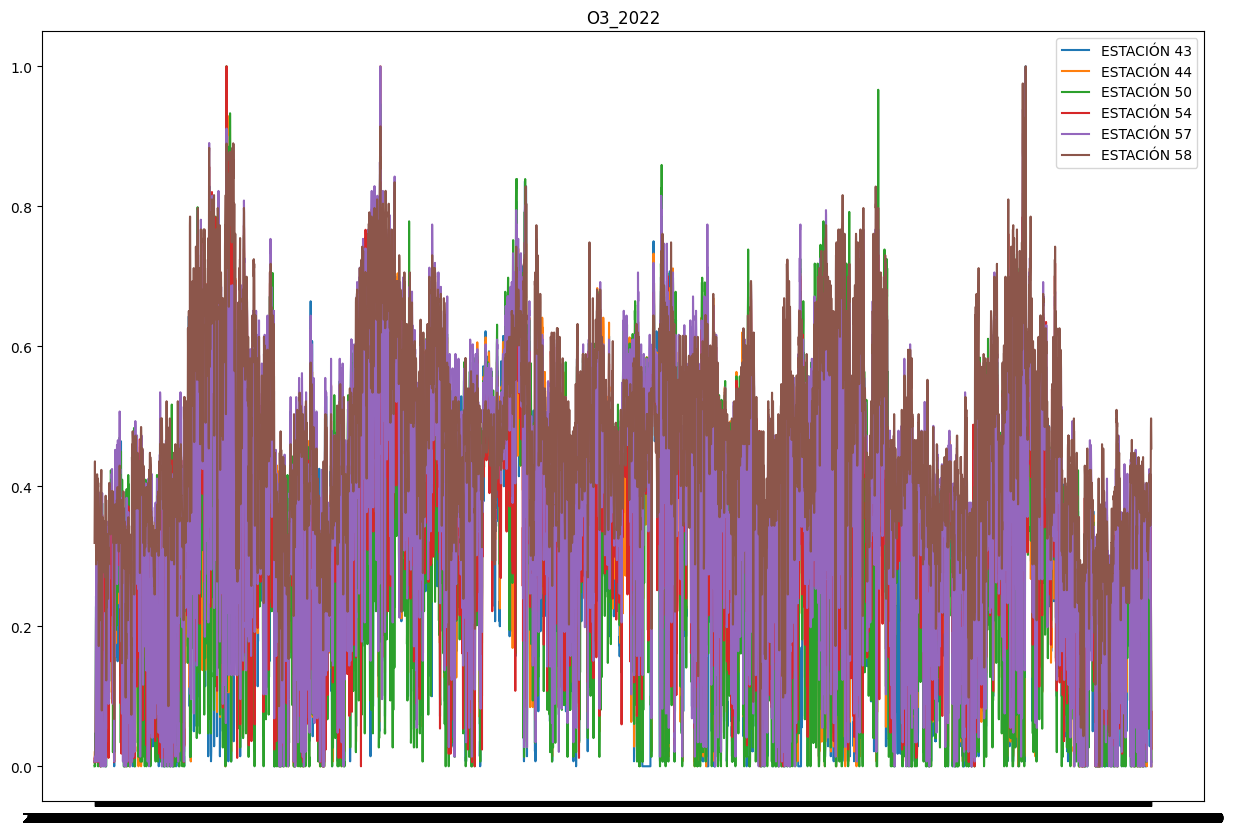

In [ ]:
plt.figure(figsize=(15, 22))
plt.subplot(2,1,1)
x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/O3_2021.csv", index_col=None, header=0)
y=x.columns
[a,b]=x.shape
for n in range(1,b):
  plt.plot(x['Unnamed: 0'], x.iloc[:,n])
plt.title('O3_2021')
plt.legend(y[1:])


plt.figure(figsize=(15, 22))
plt.subplot(2,1,2)
x2 = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/O3_2022.csv", index_col=None, header=0)
y2=x2.columns
[a,b]=x2.shape
for n in range(1,b):
  plt.plot(x2['Unnamed: 0'], x2.iloc[:,n])
plt.title('O3_2022')
plt.legend(y2[1:])

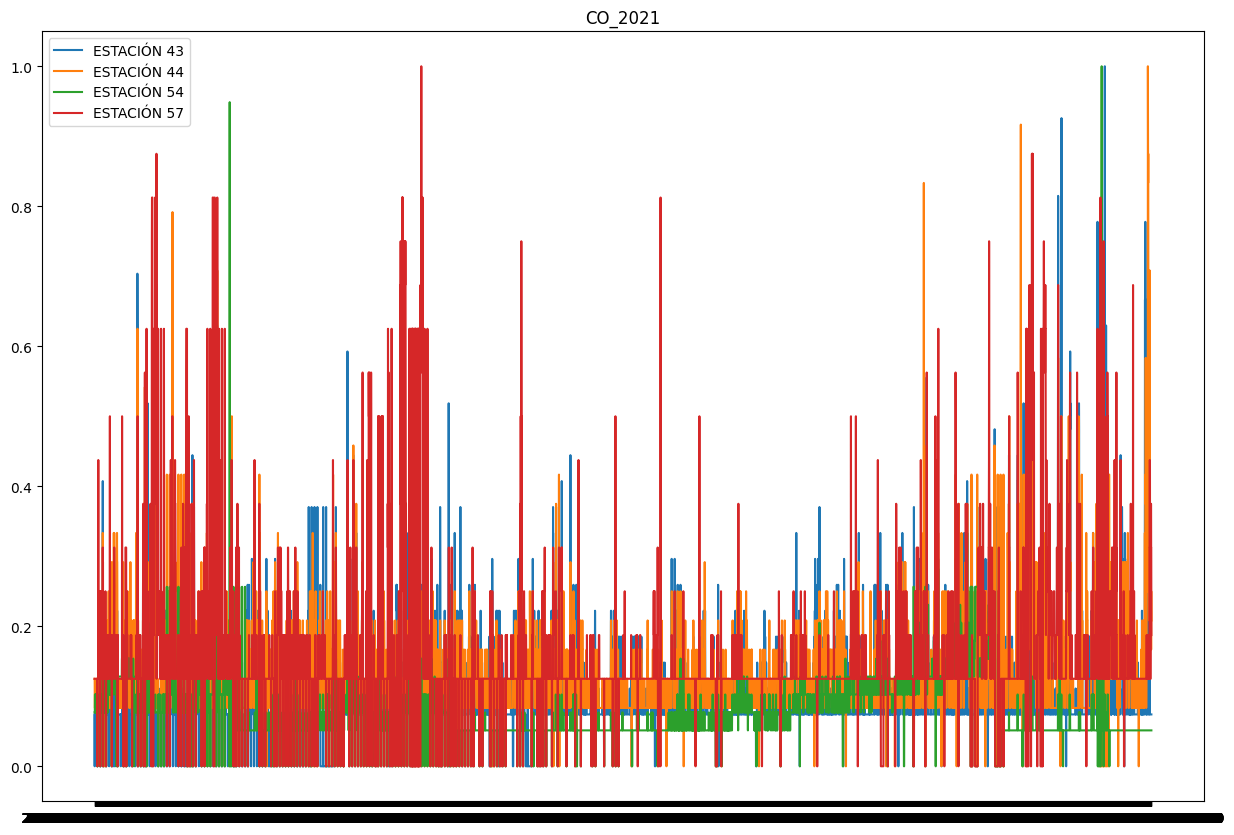

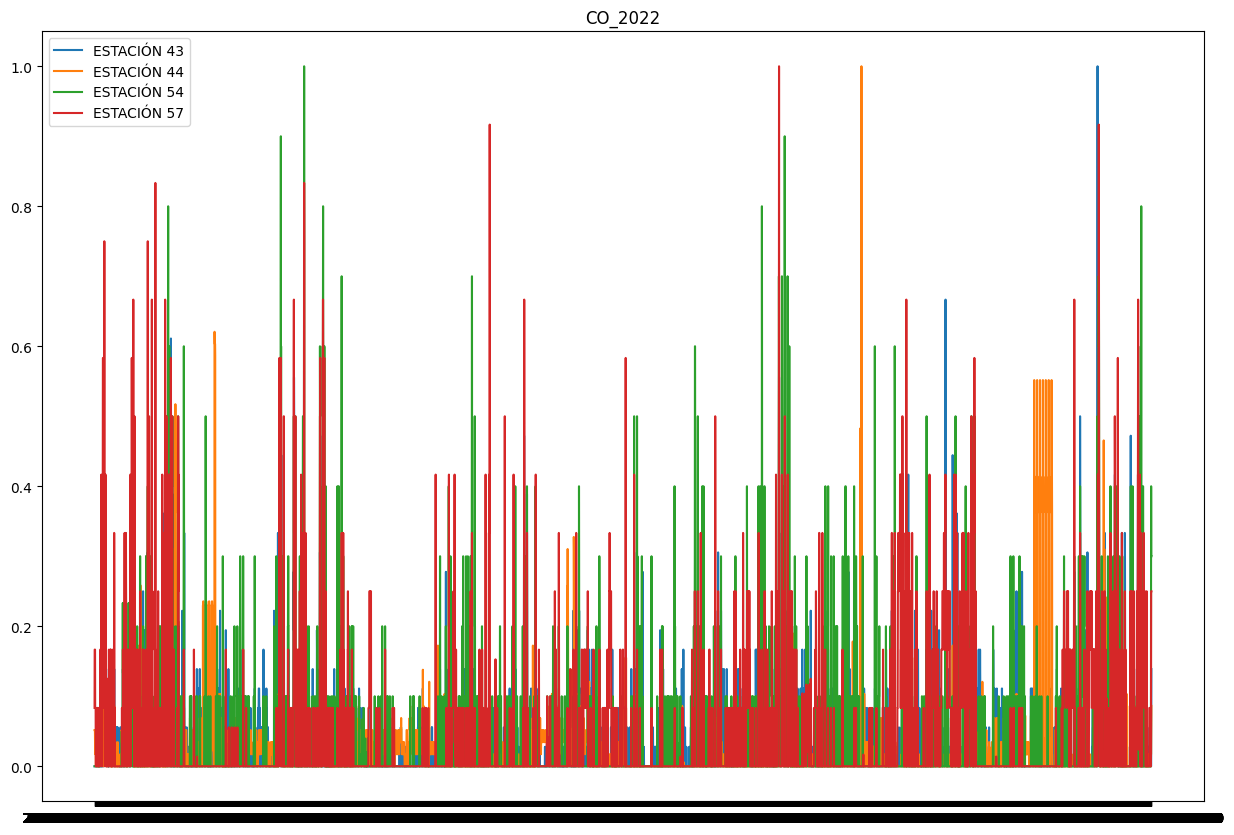

In [ ]:
plt.figure(figsize=(15, 22))
plt.subplot(2,1,1)
x = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2021/CO_2021.csv", index_col=None, header=0)
y=x.columns
[a,b]=x.shape
for n in range(1,b):
  plt.plot(x['Unnamed: 0'], x.iloc[:,n])
plt.title('CO_2021')
plt.legend(y[1:])


plt.figure(figsize=(15, 22))
plt.subplot(2,1,2)
x2 = pd.read_csv("/content/drive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/Datos normalizados/2022/CO_2022.csv", index_col=None, header=0)
y2=x2.columns
[a,b]=x2.shape
for n in range(1,b):
  plt.plot(x2['Unnamed: 0'], x2.iloc[:,n])
plt.title('CO_2022')
plt.legend(y2[1:])

##[Dades metereològiques](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/mesures-estacions-meteorologiques): 
  - [ ] Explorar i transformar les dades de la qualitat de l’aire de Barcelona de 2022 i 2022. 
  - [ ] Fer les transformacions pertinents
  - [ ] Posar en un format preferenement numèric tots els valors (podem deixar-ne alguns com a “strings” o textos? Amb quin objectiu?)
  - [ ] Assegurar-se de que són vàlids utilitzant les columnes que comencen per “Vxx”
  - [ ] Hi ha algun altre valor que us faci sospitar que ho sigui correcte
Tractar els valors no presents utilitzant les tècniques presentades en classe ( i que estan breument descrites a les transparències U1. 
  - [ ] Data Explorartion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mDates
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
!ls "/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/metadata" #CAMBIAR ACORDE A TU DRIVE!!!

In [ ]:
meta_DM=pd.read_csv("/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/metadata/MeteoCat_Metadades.csv")
meta_DM

In [ ]:
!ls "/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2021" #CAMBIAR ACORDE A TU DRIVE!!!

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/tercer cuatrimestre/Inteligencia artificial/Tascas/Tasca 1/2021/2021_MeteoCat_Detall_Estacions.csv", index_col=None, header=0)
df.head()

In [ ]:
frame=df.set_index(['CODI_ESTACIO','ACRÒNIM'])
frame.head()

In [ ]:
frame.loc['D5','TN'].head()

In [ ]:
frame.drop(['DATA_EXTREM'],axis = 1, inplace= True)
frame

No hay formato de fecha para la columna DATA_LECTURA. 

In [ ]:
type(frame['DATA_LECTURA'][0])

Ninguna medida esta como NAN. 

In [ ]:
frame['VALOR'].isnull().sum()

# **Referencias:**


*   Pandas doc:
*   Matplot lib doc:
*   Numpy lib doc:
*   Stackoverflow:
*   ChatGPT:




